## IGS Report (Correlation between air pollution & socioeconomic factors)

## Structure
### Introduction (10%)

### Literature Review (20%-25%)

### Data & Summary Statistic (5%-10%) [13,16,19]

1. Geographic Boundary (Office for National Statistics)
   - All data is in 2011 lsoa boundary (4636 available)
2. Air Quality Data （'https://data.london.gov.uk/air-quality/'
   - 2006, 2008, 2010, 2013, 2016, 2019 (LSOA level)
   - Standard Deviation of 20m pixels (each of which are annual PM2.5/PM10/No2/Nox) in the LSOA
   - Maximum value of 20m pixels (each of which are annual PM2.5) in the LSOA
   - Minimum value of 20m pixels (each of which are annual PM2.5) in the LSOA
3. Population Density （'https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareapopulationdensity'
   - 2011-2020
   - persons per sq km
   - Mid-year (30 June) population density of Lower layer Super Output Areas (LSOAs) in England and Wales based on estimates of the usual resident population.
   - Demographic Team of National Statistic
   - Release Date: 24 March, 2024
4. Entertainment Density （'https://data.london.gov.uk/dataset/pubs-clubs-restaurants-takeaways-borough'
   - (take away shops + pubs + restuarants) / borough area (sq km)
   - The number of workplaces and employment in London for the Industrial Sectors: Public Houses and Bars, Licensed restaurants, Unlicensed restaurants and cafes, Take away food shops and mobile food stands, Licensed clubs (Borough Level)e MSOA.
5. Old Generation Percentage (Office for National Statistics)
   - 65+ / total pop （文献通常关注5岁及以下儿童和65岁及以上的人口比例，可能需要调整）
   - Demographic Team of National Statistic
   - 2012 to 2020 age groups and sex in lsoa
   - The estimated resident population of an area includes all those people who usually live there, regardless of nationality. Arriving international migrants are included in the usually resident population if they rematin in the UK for at least a year. Emigrants are exluded if they remain ourside the UK for at least a year. This is consistant with the United Nations definition of a long-term migrant. Armed forces stationed outside of the UK are excluded. Students are taken to be usually residen at their term time address.
6.  Percentage of jobs with high emmissions ('https://npalomin.github.io/pnum/MPL.html'
    ('https://www.nomisweb.co.uk/query/construct/summary.asp?reset=yes&mode=construct&dataset=189&version=0&anal=1'
   - 4829 LSOA Areas
   - Employees: An employee is anyone aged 16 years or over that an organisation directly pays from its payroll(s), in return for carrying out a full-time or part-time job or being on a training scheme. It excludes voluntary workers, self-employed, working owners who are not paid via PAYE.
   - Estimated number of jobs per LSOA (N = 4,835 obs.) Includes Industry percentage (percentage of jobs in industries listed below)
   - Industries (1.Mining and quarrying 2.Manufacturing 3.Electricity, gas, steam and air conditiong supply 4.Water supply; sewerage, waste management and remediation activities 5.Construction 6.Wholesale and retail trade; repair of motor vehicles and motorcycles 7.Transportation and storage)
   - Dataset name: Business Register and Employment Survey - BRES
   - Source: nomis - official census and labour market statistics (Office for National Statistic)
8. Unemployment rate (borough level) ('https://data.london.gov.uk/dataset/model-based-unemployment-estimates'
   - the unemployment count as a percentage of the economically active population aged 16+
   - All people aged 16+ without a job who were available to start wark in the two weeks following their interview and who had either looked for work in the four weeks prior to interview or were waiting to
   - The Office for National Statistics (ONS) has jointly developed with Professor Ray Chambers of the University of Southampton, a new modelling methodology to produce modelled estimates of unemployment levels and rates on the International Labour Organisation (ILO) definition for local authority districts and unitary authorities (LAD/UAs). The unemployed population consists of those people out of work, who are actively looking for work and are available to start immediately. The data are taken from the Annual Population Survey, produced by the Office for National Statistics.
9. Housing Price (Land Registry) ('https://data.london.gov.uk/dataset/average-house-prices'
   - median and mean in £
   - Annual mean and median property prices calculated by the GLA from Price Paid Data published on Land Registry website. Number of property sales also included. Data has been aggregated to Borough, Ward, MSOA, LSOA, Postcode Districts and Postcode Sectors.
   - Price Paid Data provides information on every residential property sale in England and Wales that has been lodged with HM Land Registry for registration.
10. Limitation
    - The dataset is not enough to consider the time fixed effects since it only contains three years' data. Thus, this paper finally use the spatial regression model which only consider the spatial autocorrelation. 
Empirical Design (10%)

### Empirical Design
1. Ordinary Least Squares Regression Model (OLS)
2. Spatial Lag Model (SAR）
3. Global Moran's I

### Results (20%)
- 相比于以前的OLS Results，spatial lag regression model的结果是相反的，即人口密度越高的地区空气污染指数越高
- 所有housing price和unemployment rate与空气污染指数的相关性都统计学不显著
- No2和Nox与population density之间的关系非常显著
- 与空气污染指数最相关的变量是空间相关性 其次是population density

### Discussion (20%)

### Conclusion (10%)

In [1]:
import numpy as np
import pandas as pd

## Air Quality Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/london_air_quality_data.csv')
barea = pd.read_excel('../data/Area of London Boroughs.xlsx')

In [4]:
df

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area,geometry,...,PM10-2019-min,PM10-2019-max,PM10-2019-mean,PM10-2019-std,PM10-2019-median,PM25-2019-min,PM25-2019-max,PM25-2019-mean,PM25-2019-std,PM25-2019-median
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,13.33,"POLYGON ((532105.0919998939 182011.23, 532162....",...,21.401,43.266,23.851,4.364,22.336,12.721,20.290,13.563,1.596,13.002
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,22.62,"POLYGON ((532746.8130000263 181786.891000028, ...",...,21.555,42.033,22.713,2.563,22.205,12.688,20.162,13.065,0.920,12.879
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,5.73,"POLYGON ((532135.1449999654 182198.1190000199,...",...,20.941,48.336,21.892,2.803,21.452,12.558,21.677,12.877,0.937,12.722
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,19.07,"POLYGON ((533807.9460001207 180767.7700000888,...",...,20.569,61.689,23.911,4.951,22.422,12.406,22.884,13.392,1.416,12.963
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.42,"POLYGON ((545122.048999952 184314.931000118, 5...",...,15.846,18.664,16.259,0.260,16.222,10.431,11.604,10.606,0.101,10.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,12.33,"POLYGON ((544642.6800000862 179824.6740001431,...",...,15.617,16.375,15.741,0.138,15.695,10.232,10.510,10.285,0.054,10.268
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,100.49,"POLYGON ((546579.1949997952 181097.8129996927,...",...,14.967,26.849,15.378,0.698,15.247,10.041,14.373,10.177,0.244,10.135
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,15.23,"POLYGON ((544536.4859999884 179447.1149999507,...",...,15.697,24.278,16.223,0.756,16.058,10.266,13.161,10.468,0.259,10.416
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,55.85,"POLYGON ((546415.7449998577 180152.2700002448,...",...,15.067,31.394,16.199,1.813,15.621,10.065,15.630,10.448,0.606,10.260


In [5]:
df.rename(columns={'NO2-2013-mean': 'NO2_13_m', 
                   'NO2-2013-median': 'NO2_13_md',
                 'NOx-2013-mean': 'NOx_13_m',
                  'NOx-2013-median': 'NOx_13_md',
                  'PM10-2013-mean':'PM10_13_m',
                  'PM10-2013-median':'PM10_13_md',
                  'PM25-2013-mean':'PM25_13_m',
                  'PM25-2013-median':'PM25_13_md',
                  'NO2-2016-mean':'NO2_16_m',
                  'NO2-2016-median':'NO2_16_md',
                  'NOx-2016-mean':'NOx_16_m',
                  'NOx-2016-median':'NOx_16_md',
                  'PM10-2016-mean':'PM10_16_m',
                  'PM10-2016-median':'PM10_16_md',
                  'PM25-2016-mean':'PM25_16_m',
                  'PM25-2016-median':'PM25_16_md',
                  'NO2-2019-mean':'NO2_19_m',
                  'NO2-2019-median':'NO2_19_md',
                  'NOx-2019-mean':'NOx_19_m',
                  'NOx-2019-median':'NOx_19_md',
                  'PM10-2019-mean':'PM10_19_m',
                  'PM10-2019-median':'PM10_19_md',
                  'PM25-2019-mean':'PM25_19_m',
                  'PM25-2019-median':'PM25_19_md'}, inplace=True)

In [6]:
df = pd.merge(df,
                barea,
                left_on ='LAD11NM',
                   right_on='Borough Name',
                   how='inner')
del df['Borough Name']
df

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area,geometry,...,PM10-2019-max,PM10_19_m,PM10-2019-std,PM10_19_md,PM25-2019-min,PM25-2019-max,PM25_19_m,PM25-2019-std,PM25_19_md,Area (sq km)
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,13.33,"POLYGON ((532105.0919998939 182011.23, 532162....",...,43.266,23.851,4.364,22.336,12.721,20.290,13.563,1.596,13.002,2.9008
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,22.62,"POLYGON ((532746.8130000263 181786.891000028, ...",...,42.033,22.713,2.563,22.205,12.688,20.162,13.065,0.920,12.879,2.9008
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,5.73,"POLYGON ((532135.1449999654 182198.1190000199,...",...,48.336,21.892,2.803,21.452,12.558,21.677,12.877,0.937,12.722,2.9008
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,19.07,"POLYGON ((533807.9460001207 180767.7700000888,...",...,61.689,23.911,4.951,22.422,12.406,22.884,13.392,1.416,12.963,2.9008
4,E01032739,City of London 001F,E02000001,City of London 001,E09000001,City of London,E12000007,London,165.85,MULTIPOLYGON (((531667.6240003224 180534.99200...,...,82.349,23.375,4.593,22.302,12.405,28.394,13.307,1.328,12.962,2.9008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033604,Westminster 009J,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.32,"POLYGON ((526962.1960000906 181855.9340000052,...",...,67.288,22.488,6.920,20.060,12.065,28.802,13.196,2.331,12.401,21.4711
4831,E01033605,Westminster 009K,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.39,"POLYGON ((526888.382000066 182291.6209999029, ...",...,20.730,19.134,0.499,19.119,11.767,12.613,12.047,0.182,12.031,21.4711
4832,E01033606,Westminster 014F,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,2.72,"POLYGON ((525237.341000009 181558.4279999779, ...",...,24.810,19.346,1.517,18.861,11.704,13.253,11.980,0.356,11.864,21.4711
4833,E01033607,Westminster 014G,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,8.45,"POLYGON ((525582.1829999581 181638.5469998908,...",...,37.843,19.791,3.555,18.688,11.765,17.421,12.199,1.020,11.887,21.4711


## Population Density

In [7]:
pop_13 = pd.read_excel('../data/Population Density/SAPE20DT11-mid-2013-lsoa-population-density.xls',
                       sheet_name='Mid-2013 Population Density',
                       skiprows = [0,1,2,3])

pop_16  = pd.read_excel('../data/Population Density/SAPE20DT11-mid-2016-lsoa-population-density.xls',
                       sheet_name='Mid-2016 Population Density',
                       skiprows = [0,1,2,3])

pop_19 = pd.read_excel('../data/Population Density/SAPE22DT11-mid-2019-lsoa-population-density.xls',
                       sheet_name='Mid-2019 Population Density',
                       skiprows = [0,1,2,3])

In [8]:
pop_13 = pop_13.rename(columns={'Code':'LSOA Code', 'Name':'LSOA Name', 'People per Sq Km': 'popden_13'})
pop_13

,LSOA Code,LSOA Name,Mid-2013 population,Area Sq Km,popden_13
0,E01020634,County Durham 001A,1519,6.4975,234
1,E01020635,County Durham 001B,1368,1.6963,806
2,E01020636,County Durham 001C,1704,0.9272,1838
3,E01020654,County Durham 001D,1749,0.9884,1770
4,E01020676,County Durham 001E,1496,5.4717,273
...,...,...,...,...,...
34748,W01001636,Newport 020A,1987,11.5160,173
34749,W01001657,Newport 020C,1420,8.8184,161
34750,W01001658,Newport 020D,1902,3.6514,521
34751,W01001912,Newport 020E,1386,16.0709,86


In [9]:
pop_16 = pop_16.rename(columns={'Code':'LSOA Code', 'Name':'LSOA Name', 'People per Sq Km': 'popden_16'})
pop_16 = pop_16[['LSOA Code','Mid-2016 population','popden_16']]
pop_16

,LSOA Code,Mid-2016 population,popden_16
0,E01020634,1594,245
1,E01020635,1332,785
2,E01020636,1711,1845
3,E01020654,1833,1855
4,E01020676,1475,270
...,...,...,...
34748,W01001636,1991,173
34749,W01001657,1453,165
34750,W01001658,1999,547
34751,W01001912,1391,87


In [10]:
pop_19 = pop_19.rename(columns={'People per Sq Km': 'popden_19'})
pop_19 = pop_19[['LSOA Code','Mid-2019 population','popden_19']]
pop_19

,LSOA Code,Mid-2019 population,popden_19
0,E01011949,1954,3765.658123
1,E01011950,1257,9486.792453
2,E01011951,1209,5795.781400
3,E01011952,1740,3749.191984
4,E01011953,2033,2301.596287
...,...,...,...
34748,W01001320,1408,1268.697063
34749,W01001321,1545,310.384314
34750,W01001322,1614,2580.335731
34751,W01001324,2116,556.315070


In [11]:
#merge population density data
popden = pd.merge(pop_13,
                    pop_16,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='outer')

popden = pd.merge(popden,
                    pop_19,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='outer')

popden

,LSOA Code,LSOA Name,Mid-2013 population,Area Sq Km,popden_13,Mid-2016 population,popden_16,Mid-2019 population,popden_19
0,E01020634,County Durham 001A,1519,6.4975,234,1594,245,1676,257.945364
1,E01020635,County Durham 001B,1368,1.6963,806,1332,785,1352,797.028827
2,E01020636,County Durham 001C,1704,0.9272,1838,1711,1845,1744,1880.931838
3,E01020654,County Durham 001D,1749,0.9884,1770,1833,1855,1852,1873.735330
4,E01020676,County Durham 001E,1496,5.4717,273,1475,270,1501,274.320595
...,...,...,...,...,...,...,...,...,...
34748,W01001636,Newport 020A,1987,11.5160,173,1991,173,1906,165.508857
34749,W01001657,Newport 020C,1420,8.8184,161,1453,165,1421,161.140343
34750,W01001658,Newport 020D,1902,3.6514,521,1999,547,1974,540.614559
34751,W01001912,Newport 020E,1386,16.0709,86,1391,87,1418,88.234013


In [12]:
popden['popden_13'] = np.log(popden['popden_13'])
popden['popden_16'] = np.log(popden['popden_16'])
popden['popden_19'] = np.log(popden['popden_19'])

## Entertainment Density

In [13]:
#The number of pulic houses
pub = pd.read_excel('../data/Social Place/publichouse.xls',
                           sheet_name='Pubs bars London MSOAs',
                         skiprows = [0,1],
                           nrows=983)
club = pd.read_excel('../data/Social Place/clubs and rest.xls',
                           sheet_name='Clubs',
                         skiprows = [0,1],
                           nrows=34)
rest = pd.read_excel('../data/Social Place/clubs and rest.xls',
                           sheet_name='Licensed restaurants',
                         skiprows = [0,1],
                           nrows=34)
takea = pd.read_excel('../data/Social Place/takeaway.xls')

pub = pub.rename(columns={2013: 'p_numb_13', 2016: 'p_numb_16', 2019: 'p_numb_19'})
club = club.rename(columns={2013: 'c_numb_13', 2016: 'c_numb_16', 2019: 'c_numb_19'})
rest = rest.rename(columns={2013: 'r_numb_13', 2016: 'r_numb_16', 2019: 'r_numb_19'})

pub = pub.rename(columns={'LA code': 'Area code'})

pub = pub[['Area code','p_numb_13','p_numb_16','p_numb_19']]
club = club[['Area code','c_numb_13','c_numb_16','c_numb_19']]
rest = rest[['Area code','r_numb_13','r_numb_16','r_numb_19']]

In [14]:
takea

,Area code,t_numb_13,t_numb_16,t_numb_19
0,E09000001,1600,1900,2000
1,E09000002,400,600,800
2,E09000003,1100,1100,1000
3,E09000004,400,600,600
4,E09000005,600,1100,1000
5,E09000006,900,1200,1100
6,E09000007,1900,1900,2000
7,E09000008,1100,1200,1200
8,E09000009,1100,1100,1200
9,E09000010,600,700,700


In [15]:
pub

,Area code,p_numb_13,p_numb_16,p_numb_19
0,E09000001,155,150,165
1,E09000002,0,0,0
2,E09000002,5,5,0
3,E09000002,0,0,0
4,E09000002,0,0,0
...,...,...,...,...
978,E09000033,30,30,25
979,E09000033,10,10,15
980,E09000033,5,10,5
981,E09000033,10,10,10


In [16]:
pub = pub.groupby('Area code').sum().reset_index()
pub

,Area code,p_numb_13,p_numb_16,p_numb_19
0,E09000001,155,150,165
1,E09000002,10,20,10
2,E09000003,80,90,45
3,E09000004,85,75,75
4,E09000005,55,55,50
5,E09000006,85,80,85
6,E09000007,245,235,230
7,E09000008,65,70,60
8,E09000009,90,85,90
9,E09000010,65,60,45


In [17]:
## and merge all entertainment datasets
entertaiment = pd.merge(pub, club, on='Area code', how='inner')
entertaiment = pd.merge(entertaiment, rest, on='Area code', how='inner')
entertaiment = pd.merge(entertaiment, takea, on='Area code', how='inner')

entertaiment

,Area code,p_numb_13,p_numb_16,p_numb_19,c_numb_13,c_numb_16,c_numb_19,r_numb_13,r_numb_16,r_numb_19,t_numb_13,t_numb_16,t_numb_19
0,E09000001,155,150,165,10,15,15,230,270,300,1600,1900,2000
1,E09000002,10,20,10,10,10,15,40,40,45,400,600,800
2,E09000003,80,90,45,15,15,10,250,245,275,1100,1100,1000
3,E09000004,85,75,75,20,20,20,105,110,115,400,600,600
4,E09000005,55,55,50,15,15,10,170,200,220,600,1100,1000
5,E09000006,85,80,85,25,20,20,185,190,210,900,1200,1100
6,E09000007,245,235,230,25,20,20,480,570,630,1900,1900,2000
7,E09000008,65,70,60,30,30,20,155,185,200,1100,1200,1200
8,E09000009,90,85,90,20,20,15,165,190,210,1100,1100,1200
9,E09000010,65,60,45,20,15,15,125,155,160,600,700,700


In [18]:
# Define the columns you want to sum
columns_to_sum_13 = ['p_numb_13', 't_numb_13', 'r_numb_13']
columns_to_sum_16 = ['p_numb_16', 't_numb_16', 'r_numb_16']
columns_to_sum_19 = ['p_numb_19', 't_numb_19', 'r_numb_19']

# sum the specified columns
entertaiment['enter_13'] = entertaiment[columns_to_sum_13].sum(axis=1)
entertaiment['enter_16'] = entertaiment[columns_to_sum_16].sum(axis=1)
entertaiment['enter_19'] = entertaiment[columns_to_sum_19].sum(axis=1)

# Display the DataFrame with summed values
entertaiment

,Area code,p_numb_13,p_numb_16,p_numb_19,c_numb_13,c_numb_16,c_numb_19,r_numb_13,r_numb_16,r_numb_19,t_numb_13,t_numb_16,t_numb_19,enter_13,enter_16,enter_19
0,E09000001,155,150,165,10,15,15,230,270,300,1600,1900,2000,1985,2320,2465
1,E09000002,10,20,10,10,10,15,40,40,45,400,600,800,450,660,855
2,E09000003,80,90,45,15,15,10,250,245,275,1100,1100,1000,1430,1435,1320
3,E09000004,85,75,75,20,20,20,105,110,115,400,600,600,590,785,790
4,E09000005,55,55,50,15,15,10,170,200,220,600,1100,1000,825,1355,1270
5,E09000006,85,80,85,25,20,20,185,190,210,900,1200,1100,1170,1470,1395
6,E09000007,245,235,230,25,20,20,480,570,630,1900,1900,2000,2625,2705,2860
7,E09000008,65,70,60,30,30,20,155,185,200,1100,1200,1200,1320,1455,1460
8,E09000009,90,85,90,20,20,15,165,190,210,1100,1100,1200,1355,1375,1500
9,E09000010,65,60,45,20,15,15,125,155,160,600,700,700,790,915,905


## Age

In [19]:
#2013 data
age_ratio_13 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2013.xls',
                           sheet_name='Mid-2013 Persons',
                         skiprows = [0,1,2,3])
age_ratio_13 = age_ratio_13[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]


males_ratio_13 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2013.xls',
                           sheet_name='Mid-2013 Males',
                         skiprows = [0,1,2,3])

males_ratio_13 = males_ratio_13[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]

females_ratio_13 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2013.xls',
                           sheet_name='Mid-2013 Females',
                         skiprows = [0,1,2,3])

females_ratio_13 = females_ratio_13[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]

In [20]:
males_ratio_13

,Area Codes,All Ages,0-15,16-29,30-44,45-64,65+
0,E06000047,253165,45273,46796,45540,70453,45103
1,E01020634,738,130,99,152,204,153
2,E01020635,686,109,72,147,219,139
3,E01020636,858,178,130,179,212,159
4,E01020654,874,164,125,182,255,148
...,...,...,...,...,...,...,...
35096,W01001636,981,260,143,222,247,109
35097,W01001657,689,142,106,125,227,89
35098,W01001658,902,231,113,183,249,126
35099,W01001912,691,136,75,148,173,159


In [21]:
## rename some variables to differentiate males and females 

var_names = ['All Ages','0-15','16-29','30-44','45-64','65+']

for age_range in var_names:
    males_ratio_13 = males_ratio_13.rename(columns={age_range:age_range+'_m'})
    females_ratio_13 = females_ratio_13.rename(columns={age_range:age_range+'_f'})

## and merge all age ratios files 

age_ratio_13 = pd.merge(age_ratio_13,
                    males_ratio_13,
                    left_on='Area Codes',
                    right_on='Area Codes',
                    how='outer')


age_ratio_13 = pd.merge(age_ratio_13,
                    females_ratio_13,
                    left_on='Area Codes',
                    right_on='Area Codes',
                    how='outer')

for col in age_ratio_13.columns:
    # Check if the column name is not 'Area Codes'
    if col != 'Area Codes':
        # Append '_13' to the column name
        new_col_name = col + '_13'
        # Rename the column in the DataFrame
        age_ratio_13.rename(columns={col: new_col_name}, inplace=True)

age_ratio_13

,Area Codes,All Ages_13,0-15_13,16-29_13,30-44_13,45-64_13,65+_13,All Ages_m_13,0-15_m_13,16-29_m_13,30-44_m_13,45-64_m_13,65+_m_13,All Ages_f_13,0-15_f_13,16-29_f_13,30-44_f_13,45-64_f_13,65+_f_13
0,E06000047,515923,88347,92803,92403,143359,99011,253165,45273,46796,45540,70453,45103,262758,43074,46007,46863,72906,53908
1,E01020634,1519,239,193,304,435,348,738,130,99,152,204,153,781,109,94,152,231,195
2,E01020635,1368,213,166,275,432,282,686,109,72,147,219,139,682,104,94,128,213,143
3,E01020636,1704,303,279,351,437,334,858,178,130,179,212,159,846,125,149,172,225,175
4,E01020654,1749,302,249,360,522,316,874,164,125,182,255,148,875,138,124,178,267,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35096,W01001636,1987,508,287,491,498,203,981,260,143,222,247,109,1006,248,144,269,251,94
35097,W01001657,1420,299,209,260,474,178,689,142,106,125,227,89,731,157,103,135,247,89
35098,W01001658,1902,447,232,410,512,301,902,231,113,183,249,126,1000,216,119,227,263,175
35099,W01001912,1386,242,165,292,366,321,691,136,75,148,173,159,695,106,90,144,193,162


In [22]:
#2016 Data
age_ratio_16 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2016.xls',
                           sheet_name='Mid-2016 Persons',
                         skiprows = [0,1,2,3])
age_ratio_16 = age_ratio_16[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]


males_ratio_16 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2016.xls',
                           sheet_name='Mid-2016 Males',
                         skiprows = [0,1,2,3])

males_ratio_16 = males_ratio_16[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]

females_ratio_16 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2016.xls',
                           sheet_name='Mid-2016 Females',
                         skiprows = [0,1,2,3])

females_ratio_16 = females_ratio_16[['Area Codes','All Ages','0-15','16-29','30-44','45-64','65+']]

In [23]:
males_ratio_16

,Area Codes,All Ages,0-15,16-29,30-44,45-64,65+
0,E06000047,256431,45751,47062,43783,71217,48618
1,E01020634,762,137,97,146,221,161
2,E01020635,658,107,78,127,202,144
3,E01020636,846,180,123,155,232,156
4,E01020654,897,166,104,170,280,177
...,...,...,...,...,...,...,...
35096,W01001636,982,248,148,187,285,114
35097,W01001657,716,137,105,131,221,122
35098,W01001658,946,233,115,180,275,143
35099,W01001912,701,115,86,152,167,181


In [24]:
## rename some variables to differentiate males and females 

var_names = ['All Ages','0-15','16-29','30-44','45-64','65+']

for age_range in var_names:
    males_ratio_16 = males_ratio_16.rename(columns={age_range:age_range+'_m'})
    females_ratio_16 = females_ratio_16.rename(columns={age_range:age_range+'_f'})

## and merge all age ratios files 

age_ratio_16 = pd.merge(age_ratio_16,
                    males_ratio_16,
                    left_on='Area Codes',
                    right_on='Area Codes',
                    how='outer')


age_ratio_16 = pd.merge(age_ratio_16,
                    females_ratio_16,
                    left_on='Area Codes',
                    right_on='Area Codes',
                    how='outer')

for col in age_ratio_16.columns:
    # Check if the column name is not 'Area Codes'
    if col != 'Area Codes':
        # Append '_13' to the column name
        new_col_name = col + '_16'
        # Rename the column in the DataFrame
        age_ratio_16.rename(columns={col: new_col_name}, inplace=True)

age_ratio_16

,Area Codes,All Ages_16,0-15_16,16-29_16,30-44_16,45-64_16,65+_16,All Ages_m_16,0-15_m_16,16-29_m_16,30-44_m_16,45-64_m_16,65+_m_16,All Ages_f_16,0-15_f_16,16-29_f_16,30-44_f_16,45-64_f_16,65+_f_16
0,E06000047,521776,89113,92948,89183,145119,105413,256431,45751,47062,43783,71217,48618,265345,43362,45886,45400,73902,56795
1,E01020634,1594,257,216,290,457,374,762,137,97,146,221,161,832,120,119,144,236,213
2,E01020635,1332,211,165,260,398,298,658,107,78,127,202,144,674,104,87,133,196,154
3,E01020636,1711,333,261,327,466,324,846,180,123,155,232,156,865,153,138,172,234,168
4,E01020654,1833,299,222,354,546,412,897,166,104,170,280,177,936,133,118,184,266,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35096,W01001636,1991,487,277,442,559,226,982,248,148,187,285,114,1009,239,129,255,274,112
35097,W01001657,1453,285,213,255,468,232,716,137,105,131,221,122,737,148,108,124,247,110
35098,W01001658,1999,458,228,408,571,334,946,233,115,180,275,143,1053,225,113,228,296,191
35099,W01001912,1391,222,161,269,367,372,701,115,86,152,167,181,690,107,75,117,200,191


In [25]:
#2019 Data
age_ratio_19 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2019.xls',
                           sheet_name='Mid-2019 Persons',
                         skiprows = [0,1,2,3])
age_ratio_19 = age_ratio_19[['LSOA Code','All Ages','0-15','16-29','30-44','45-64','65+']]


males_ratio_19 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2019.xls',
                           sheet_name='Mid-2019 Males',
                         skiprows = [0,1,2,3])

males_ratio_19 = males_ratio_19[['LSOA Code','All Ages','0-15','16-29','30-44','45-64','65+']]

females_ratio_19 = pd.read_excel('../data/2012-2020 age groups and sex in lsoa/2019.xls',
                           sheet_name='Mid-2019 Females',
                         skiprows = [0,1,2,3])

females_ratio_19 = females_ratio_19[['LSOA Code','All Ages','0-15','16-29','30-44','45-64','65+']]

males_ratio_19

,LSOA Code,All Ages,0-15,16-29,30-44,45-64,65+
0,E01011949,925,218,153,169,236,149
1,E01011950,653,73,145,139,206,90
2,E01011951,658,122,131,164,175,66
3,E01011952,796,186,134,107,220,149
4,E01011953,1034,267,224,163,233,147
...,...,...,...,...,...,...,...
34748,W01001320,695,125,114,97,205,154
34749,W01001321,727,143,153,142,180,109
34750,W01001322,772,150,143,137,182,160
34751,W01001324,1069,180,159,206,273,251


In [26]:
## rename some variables to differentiate males and females 

var_names = ['All Ages','0-15','16-29','30-44','45-64','65+']

for age_range in var_names:
    males_ratio_19 = males_ratio_19.rename(columns={age_range:age_range+'_m'})
    females_ratio_19 = females_ratio_19.rename(columns={age_range:age_range+'_f'})

## and merge all age ratios files 

age_ratio_19 = pd.merge(age_ratio_19,
                    males_ratio_19,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='outer')


age_ratio_19 = pd.merge(age_ratio_19,
                    females_ratio_19,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='outer')

for col in age_ratio_19.columns:
    # Check if the column name is not 'Area Codes'
    if col != 'LSOA Code':
        # Append '_13' to the column name
        new_col_name = col + '_19'
        # Rename the column in the DataFrame
        age_ratio_19.rename(columns={col: new_col_name}, inplace=True)

age_ratio_19

,LSOA Code,All Ages_19,0-15_19,16-29_19,30-44_19,45-64_19,65+_19,All Ages_m_19,0-15_m_19,16-29_m_19,30-44_m_19,45-64_m_19,65+_m_19,All Ages_f_19,0-15_f_19,16-29_f_19,30-44_f_19,45-64_f_19,65+_f_19
0,E01011949,1954,450,315,382,502,305,925,218,153,169,236,149,1029,232,162,213,266,156
1,E01011950,1257,167,259,250,402,179,653,73,145,139,206,90,604,94,114,111,196,89
2,E01011951,1209,199,257,273,326,154,658,122,131,164,175,66,551,77,126,109,151,88
3,E01011952,1740,373,278,251,429,409,796,186,134,107,220,149,944,187,144,144,209,260
4,E01011953,2033,497,413,365,477,281,1034,267,224,163,233,147,999,230,189,202,244,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001320,1408,224,207,233,421,323,695,125,114,97,205,154,713,99,93,136,216,169
34749,W01001321,1545,314,304,296,378,253,727,143,153,142,180,109,818,171,151,154,198,144
34750,W01001322,1614,301,279,304,354,376,772,150,143,137,182,160,842,151,136,167,172,216
34751,W01001324,2116,318,306,397,564,531,1069,180,159,206,273,251,1047,138,147,191,291,280


In [27]:
#merge all age data together
age_ratio = pd.merge(age_ratio_13,
                    age_ratio_16,
                    left_on='Area Codes',
                    right_on='Area Codes',
                    how='outer')

age_ratio = pd.merge(age_ratio,
                    age_ratio_19,
                    left_on='Area Codes',
                    right_on='LSOA Code',
                    how='outer')

age_ratio

,Area Codes,All Ages_13,0-15_13,16-29_13,30-44_13,45-64_13,65+_13,All Ages_m_13,0-15_m_13,16-29_m_13,...,16-29_m_19,30-44_m_19,45-64_m_19,65+_m_19,All Ages_f_19,0-15_f_19,16-29_f_19,30-44_f_19,45-64_f_19,65+_f_19
0,E06000047,515923,88347,92803,92403,143359,99011,253165,45273,46796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E01020634,1519,239,193,304,435,348,738,130,99,...,109.0,137.0,252.0,173.0,864.0,129.0,121.0,166.0,236.0,212.0
2,E01020635,1368,213,166,275,432,282,686,109,72,...,75.0,122.0,191.0,158.0,687.0,108.0,90.0,127.0,205.0,157.0
3,E01020636,1704,303,279,351,437,334,858,178,130,...,130.0,152.0,238.0,165.0,866.0,154.0,119.0,173.0,239.0,181.0
4,E01020654,1749,302,249,360,522,316,874,164,125,...,114.0,165.0,279.0,172.0,972.0,163.0,132.0,167.0,281.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35096,W01001636,1987,508,287,491,498,203,981,260,143,...,153.0,172.0,283.0,119.0,967.0,209.0,132.0,222.0,292.0,112.0
35097,W01001657,1420,299,209,260,474,178,689,142,106,...,96.0,115.0,211.0,130.0,738.0,136.0,102.0,132.0,222.0,146.0
35098,W01001658,1902,447,232,410,512,301,902,231,113,...,119.0,182.0,250.0,149.0,1047.0,211.0,126.0,193.0,317.0,200.0
35099,W01001912,1386,242,165,292,366,321,691,136,75,...,91.0,143.0,173.0,184.0,724.0,121.0,73.0,115.0,221.0,194.0


In [28]:
age_ratio.columns

Index(['Area Codes', 'All Ages_13', '0-15_13', '16-29_13', '30-44_13',
       '45-64_13', '65+_13', 'All Ages_m_13', '0-15_m_13', '16-29_m_13',
       '30-44_m_13', '45-64_m_13', '65+_m_13', 'All Ages_f_13', '0-15_f_13',
       '16-29_f_13', '30-44_f_13', '45-64_f_13', '65+_f_13', 'All Ages_16',
       '0-15_16', '16-29_16', '30-44_16', '45-64_16', '65+_16',
       'All Ages_m_16', '0-15_m_16', '16-29_m_16', '30-44_m_16', '45-64_m_16',
       '65+_m_16', 'All Ages_f_16', '0-15_f_16', '16-29_f_16', '30-44_f_16',
       '45-64_f_16', '65+_f_16', 'LSOA Code', 'All Ages_19', '0-15_19',
       '16-29_19', '30-44_19', '45-64_19', '65+_19', 'All Ages_m_19',
       '0-15_m_19', '16-29_m_19', '30-44_m_19', '45-64_m_19', '65+_m_19',
       'All Ages_f_19', '0-15_f_19', '16-29_f_19', '30-44_f_19', '45-64_f_19',
       '65+_f_19'],
      dtype='object')

var_names_13 = ['All Ages','0-15','16-29_13','30-44_13','45-64_13','65+_13']

for age_range in var_names_13:
     age_ratio[age_range+'_mf'] = age_ratio[age_range+'_m']*100/age_ratio[age_range+'_f']

In [29]:
age_ratio['mf_13'] = age_ratio['All Ages_m_13']*100/age_ratio['All Ages_f_13']
age_ratio['mf_16'] = age_ratio['All Ages_m_16']*100/age_ratio['All Ages_f_16']
age_ratio['mf_19'] = age_ratio['All Ages_m_19']*100/age_ratio['All Ages_f_19']
age_ratio['16-29_13p'] = age_ratio['16-29_13']*100/age_ratio['All Ages_13']
age_ratio['16-29_16p'] = age_ratio['16-29_16']*100/age_ratio['All Ages_16']
age_ratio['16-29_19p'] = age_ratio['16-29_19']*100/age_ratio['All Ages_19']
age_ratio['65_13p'] = age_ratio['65+_13']*100/age_ratio['All Ages_13']
age_ratio['65_16p'] = age_ratio['65+_16']*100/age_ratio['All Ages_16']
age_ratio['65_19p'] = age_ratio['65+_19']*100/age_ratio['All Ages_19']

age_ratio[['mf_13', 'mf_16', 'mf_19', '16-29_13p', '16-29_16p', '16-29_19p', '65_13p', '65_16p', '65_19p']]

,mf_13,mf_16,mf_19,16-29_13p,16-29_16p,16-29_19p,65_13p,65_16p,65_19p
0,96.349112,96.640600,NaN,17.987762,17.813774,NaN,19.191042,20.202731,NaN
1,94.494238,91.586538,93.981481,12.705727,13.550816,13.723150,22.909809,23.462986,22.971360
2,100.586510,97.626113,96.797671,12.134503,12.387387,12.204142,20.614035,22.372372,23.298817
3,101.418440,97.803468,101.385681,16.373239,15.254237,14.277523,19.600939,18.936295,19.839450
4,99.885714,95.833333,90.534979,14.236707,12.111293,13.282937,18.067467,22.476814,21.652268
...,...,...,...,...,...,...,...,...,...
35096,97.514911,97.324083,97.104447,14.443885,13.912607,14.952781,10.216407,11.351080,12.119622
35097,94.254446,97.150611,92.547425,14.718310,14.659326,13.933849,12.535211,15.966965,19.422942
35098,90.200000,89.838557,88.538682,12.197687,11.405703,12.411348,15.825447,16.708354,17.679838
35099,99.424460,101.594203,95.856354,11.904762,11.574407,11.565585,23.160173,26.743350,26.657264


In [30]:
age_ratio.columns

Index(['Area Codes', 'All Ages_13', '0-15_13', '16-29_13', '30-44_13',
       '45-64_13', '65+_13', 'All Ages_m_13', '0-15_m_13', '16-29_m_13',
       '30-44_m_13', '45-64_m_13', '65+_m_13', 'All Ages_f_13', '0-15_f_13',
       '16-29_f_13', '30-44_f_13', '45-64_f_13', '65+_f_13', 'All Ages_16',
       '0-15_16', '16-29_16', '30-44_16', '45-64_16', '65+_16',
       'All Ages_m_16', '0-15_m_16', '16-29_m_16', '30-44_m_16', '45-64_m_16',
       '65+_m_16', 'All Ages_f_16', '0-15_f_16', '16-29_f_16', '30-44_f_16',
       '45-64_f_16', '65+_f_16', 'LSOA Code', 'All Ages_19', '0-15_19',
       '16-29_19', '30-44_19', '45-64_19', '65+_19', 'All Ages_m_19',
       '0-15_m_19', '16-29_m_19', '30-44_m_19', '45-64_m_19', '65+_m_19',
       'All Ages_f_19', '0-15_f_19', '16-29_f_19', '30-44_f_19', '45-64_f_19',
       '65+_f_19', 'mf_13', 'mf_16', 'mf_19', '16-29_13p', '16-29_16p',
       '16-29_19p', '65_13p', '65_16p', '65_19p'],
      dtype='object')

## Housing Price

In [31]:
HP_Median= pd.read_excel('../data/Housing Price(1995-2017)/land-registry-house-prices-LSOA.xls',
                           sheet_name='Median',
                         skiprows = [1])
HP_Mean= pd.read_excel('../data/Housing Price(1995-2017)/land-registry-house-prices-LSOA.xls',
                           sheet_name='Mean',
                         skiprows = [1])

In [32]:
HP_Median.columns

Index(['Code', 'Area', 'Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996', 'Year ending Dec 1996',
       'Year ending Mar 1997', 'Year ending Jun 1997', 'Year ending Sep 1997',
       ...
       'Unnamed: 93', 'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96',
       'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100',
       'Unnamed: 101', 'Unnamed: 102'],
      dtype='object', length=103)

In [33]:
HP_Mean.columns

Index(['Code', 'Area', 'Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996', 'Year ending Dec 1996',
       'Year ending Mar 1997', 'Year ending Jun 1997', 'Year ending Sep 1997',
       ...
       'Unnamed: 93', 'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96',
       'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100',
       'Unnamed: 101', 'Unnamed: 102'],
      dtype='object', length=103)

In [34]:
HP_Median.replace(':', pd.NA, inplace = True)
HP_Mean.replace(':', pd.NA, inplace = True)

In [35]:
end_col_index = HP_Median.columns.get_loc('Year ending Dec 2017')
HP_Median = HP_Median.drop(HP_Median.columns[end_col_index+1:], axis=1)

end_col_index = HP_Mean.columns.get_loc('Year ending Dec 2017')
HP_Mean = HP_Mean.drop(HP_Mean.columns[end_col_index+1:], axis=1)

In [36]:
HP_Median.loc[HP_Median['Code']== 'E01000030', 'Year ending Dec 2017']

29    <NA>
Name: Year ending Dec 2017, dtype: object

In [37]:
HP_Median.columns

Index(['Code', 'Area', 'Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996', 'Year ending Dec 1996',
       'Year ending Mar 1997', 'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998', 'Year ending Jun 1998',
       'Year ending Sep 1998', 'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999', 'Year ending Dec 1999',
       'Year ending Mar 2000', 'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001', 'Year ending Jun 2001',
       'Year ending Sep 2001', 'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002', 'Year ending Dec 2002',
       'Year ending Mar 2003', 'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004', 'Year ending Jun 2004',
       'Year ending Sep 2004', 'Year ending Dec 2004', 'Year

In [38]:
HP_Mean.columns

Index(['Code', 'Area', 'Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996', 'Year ending Dec 1996',
       'Year ending Mar 1997', 'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998', 'Year ending Jun 1998',
       'Year ending Sep 1998', 'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999', 'Year ending Dec 1999',
       'Year ending Mar 2000', 'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001', 'Year ending Jun 2001',
       'Year ending Sep 2001', 'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002', 'Year ending Dec 2002',
       'Year ending Mar 2003', 'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004', 'Year ending Jun 2004',
       'Year ending Sep 2004', 'Year ending Dec 2004', 'Year

In [39]:
### get average crime rate of each place 
to_exclude = ['Code',
             'Area']

all_dates = [var_name for var_name in HP_Median.columns if var_name not in to_exclude]

In [40]:
## compute summary stats across time 

#count Median Housing Price in 2013,2016,2019

dates2013 = [date for date in HP_Median.columns if '2013' in date]
HP_Median['HP_med_13'] = HP_Median[dates2013].mean(axis=1, skipna=True)

dates2016 = [date for date in HP_Median.columns if '2016' in date]
HP_Median['HP_med_16'] = HP_Median[dates2016].mean(axis=1, skipna=True)

dates2019 = [date for date in HP_Median.columns if '2017' in date]
HP_Median['HP_med_19'] = HP_Median[dates2019].mean(axis=1, skipna=True)

#historic_df['sample_average_crime'] = historic_df[all_dates].mean(axis=1) ## or use median or sum 
#current_df['sample_average_crime'] =historic_df[all_dates].mean(axis=1)

HP_Median = HP_Median[['Code', 'Area', 'HP_med_13','HP_med_16','HP_med_19']]

In [41]:
HP_Median

,Code,Area,HP_med_13,HP_med_16,HP_med_19
0,E01000001,City of London 001A,637187.5,967250.0,939375.0
1,E01000002,City of London 001B,633118.75,853125.0,855612.5
2,E01000003,City of London 001C,388750.0,694375.0,745750.0
3,E01000005,City of London 001E,393562.5,566875.0,530000.0
4,E01032739,City of London 001F,529375.0,593243.75,584125.0
...,...,...,...,...,...
4830,E01033604,Westminster 009J,418437.5,485000.0,600000.0
4831,E01033605,Westminster 009K,367125.0,514375.0,460000.0
4832,E01033606,Westminster 014F,724687.5,848125.0,908625.0
4833,E01033607,Westminster 014G,551875.0,696875.0,713750.0


In [42]:
### get average crime rate of each place 
to_exclude = ['Code',
             'Area']

all_dates = [var_name for var_name in HP_Mean.columns if var_name not in to_exclude]

In [43]:
## compute summary stats across time 

#count Mean Housing Price in 2013,2016,2019

dates2013 = [date for date in HP_Mean.columns if '2013' in date]
HP_Mean['HP_mean_13'] = HP_Mean[dates2013].mean(axis=1, skipna=True)

dates2016 = [date for date in HP_Mean.columns if '2016' in date]
HP_Mean['HP_mean_16'] = HP_Mean[dates2016].mean(axis=1, skipna=True)

dates2019 = [date for date in HP_Mean.columns if '2017' in date]
HP_Mean['HP_mean_19'] = HP_Mean[dates2019].mean(axis=1, skipna=True)

#historic_df['sample_average_crime'] = historic_df[all_dates].mean(axis=1) ## or use median or sum 
#current_df['sample_average_crime'] =historic_df[all_dates].mean(axis=1)

HP_Mean = HP_Mean[['Code', 'HP_mean_13','HP_mean_16','HP_mean_19']]

In [44]:
HP_Mean

,Code,HP_mean_13,HP_mean_16,HP_mean_19
0,E01000001,700060.972345,1176203.71595,1155396.87245
1,E01000002,803949.22595,970225.762588,989898.366467
2,E01000003,428746.17957,697767.602765,864374.603175
3,E01000005,385530.65476,700962.5,604166.666665
4,E01032739,677466.376825,762124.41258,765748.116987
...,...,...,...,...
4830,E01033604,551353.472223,506000.0,565819.04762
4831,E01033605,417794.047618,511033.333333,459000.0
4832,E01033606,749479.016795,910854.166657,953724.70239
4833,E01033607,1040492.652302,1177140.522875,1088367.316015


In [45]:
#merge all housing price data
HD = pd.merge(HP_Median,
                    HP_Mean,
                    left_on='Code',
                    right_on='Code',
                    how='outer')
HD

,Code,Area,HP_med_13,HP_med_16,HP_med_19,HP_mean_13,HP_mean_16,HP_mean_19
0,E01000001,City of London 001A,637187.5,967250.0,939375.0,700060.972345,1176203.71595,1155396.87245
1,E01000002,City of London 001B,633118.75,853125.0,855612.5,803949.22595,970225.762588,989898.366467
2,E01000003,City of London 001C,388750.0,694375.0,745750.0,428746.17957,697767.602765,864374.603175
3,E01000005,City of London 001E,393562.5,566875.0,530000.0,385530.65476,700962.5,604166.666665
4,E01032739,City of London 001F,529375.0,593243.75,584125.0,677466.376825,762124.41258,765748.116987
...,...,...,...,...,...,...,...,...
4830,E01033604,Westminster 009J,418437.5,485000.0,600000.0,551353.472223,506000.0,565819.04762
4831,E01033605,Westminster 009K,367125.0,514375.0,460000.0,417794.047618,511033.333333,459000.0
4832,E01033606,Westminster 014F,724687.5,848125.0,908625.0,749479.016795,910854.166657,953724.70239
4833,E01033607,Westminster 014G,551875.0,696875.0,713750.0,1040492.652302,1177140.522875,1088367.316015


In [46]:
HD.dropna

<bound method DataFrame.dropna of            Code                 Area  HP_med_13  HP_med_16 HP_med_19  \
0     E01000001  City of London 001A   637187.5   967250.0  939375.0   
1     E01000002  City of London 001B  633118.75   853125.0  855612.5   
2     E01000003  City of London 001C   388750.0   694375.0  745750.0   
3     E01000005  City of London 001E   393562.5   566875.0  530000.0   
4     E01032739  City of London 001F   529375.0  593243.75  584125.0   
...         ...                  ...        ...        ...       ...   
4830  E01033604     Westminster 009J   418437.5   485000.0  600000.0   
4831  E01033605     Westminster 009K   367125.0   514375.0  460000.0   
4832  E01033606     Westminster 014F   724687.5   848125.0  908625.0   
4833  E01033607     Westminster 014G   551875.0   696875.0  713750.0   
4834  E01033608     Westminster 007G   592437.5   854062.5  813125.0   

          HP_mean_13      HP_mean_16      HP_mean_19  
0      700060.972345   1176203.71595   1155396

In [47]:
print(HD.dtypes)

Code          object
Area          object
HP_med_13     object
HP_med_16     object
HP_med_19     object
HP_mean_13    object
HP_mean_16    object
HP_mean_19    object
dtype: object


In [48]:
HD['HP_med_13'] = pd.to_numeric(HD['HP_med_13'], errors='coerce')
HD['HP_med_16'] = pd.to_numeric(HD['HP_med_16'], errors='coerce')
HD['HP_med_19'] = pd.to_numeric(HD['HP_med_19'], errors='coerce')
HD['HP_mean_13'] = pd.to_numeric(HD['HP_mean_13'], errors='coerce')
HD['HP_mean_16'] = pd.to_numeric(HD['HP_mean_16'], errors='coerce')
HD['HP_mean_19'] = pd.to_numeric(HD['HP_mean_19'], errors='coerce')

In [49]:
HD['HP_med_13'] = np.log(HD['HP_med_13'])
HD['HP_med_16'] = np.log(HD['HP_med_16'])
HD['HP_med_19'] = np.log(HD['HP_med_19'])
HD['HP_mean_13'] = np.log(HD['HP_mean_13'])
HD['HP_mean_16'] = np.log(HD['HP_mean_16'])
HD['HP_mean_19'] = np.log(HD['HP_mean_19'])

In [50]:
HD

,Code,Area,HP_med_13,HP_med_16,HP_med_19,HP_mean_13,HP_mean_16,HP_mean_19
0,E01000001,City of London 001A,13.364819,13.782212,13.752970,13.458923,13.977803,13.959954
1,E01000002,City of London 001B,13.358413,13.656661,13.659573,13.597291,13.785284,13.805358
2,E01000003,City of London 001C,12.870692,13.450767,13.522146,12.968620,13.455641,13.669762
3,E01000005,City of London 001E,12.882995,13.247894,13.180632,12.862376,13.460210,13.311605
4,E01032739,City of London 001F,13.179452,13.293361,13.277870,13.426115,13.543865,13.548609
...,...,...,...,...,...,...,...,...
4830,E01033604,Westminster 009J,12.944283,13.091904,13.304685,13.220131,13.134292,13.246030
4831,E01033605,Westminster 009K,12.813458,13.150708,13.038982,12.942744,13.144190,13.036805
4832,E01033606,Westminster 014F,13.493496,13.650783,13.719688,13.527134,13.722138,13.768130
4833,E01033607,Westminster 014G,13.221077,13.454361,13.478288,13.855205,13.978599,13.900189


## Unemployment Rate

In [51]:
UnR= pd.read_excel('../data/Unemployment 14-21_Borough/mb-unemployment-rates.xls',
                           sheet_name='IGS data')

In [52]:
UnR

,Code,Area,unemp_2013,unemp_2016,unemp_2019
0,E09000002,Barking and Dagenham,13.6,6.8,5.7
1,E09000003,Barnet,6.5,4.9,4.5
2,E09000004,Bexley,8.1,4.2,4.2
3,E09000005,Brent,9.8,7.1,4.7
4,E09000006,Bromley,6.1,4.1,3.0
5,E09000007,Camden,7.6,5.8,4.5
6,E09000008,Croydon,8.7,5.5,5.3
7,E09000009,Ealing,10.2,5.7,5.4
8,E09000010,Enfield,9.4,6.1,6.0
9,E09000011,Greenwich,10.4,6.2,4.8


## Energy Using (elec and gas)

In [53]:
elec= pd.read_excel('../data/Energy use/elec_gas.xls',
                           sheet_name='elec')
gas= pd.read_excel('../data/Energy use/elec_gas.xls',
                           sheet_name='gas')

In [54]:
elec

,LSOA11CD,mean_e_13,med_e_13,mean_e_16,med_e_16,mean_e_19,med_e_19
0,E01000001,4218.691202,3661.10,4136.508988,3509.20,4058.907428,3501.50
1,E01000002,3953.200749,3233.80,3832.638329,3078.40,3807.043831,3094.60
2,E01000003,2807.640412,2142.85,2616.720239,2096.60,2586.591147,1965.50
3,E01000005,3049.048936,2148.00,2847.909920,2048.90,2706.988849,1995.35
4,E01000006,4391.168998,3924.40,4472.316038,3732.05,4243.872159,3581.60
...,...,...,...,...,...,...,...
4830,E01033742,3075.038071,2485.20,2806.877872,2182.80,2739.257884,2055.20
4831,E01033743,3769.513844,3298.20,3911.641071,3243.25,3713.190731,2947.00
4832,E01033744,3548.005968,2971.30,3308.579592,2690.10,3099.269993,2574.10
4833,E01033745,3901.158626,3504.90,3690.794720,3188.70,3497.112939,2912.10


In [55]:
energe = pd.merge(elec,
                    gas,
                    left_on='LSOA11CD',
                    right_on='LSOA11CD',
                    how='outer')

energe

,LSOA11CD,mean_e_13,med_e_13,mean_e_16,med_e_16,mean_e_19,med_e_19,mean_g_13,med_g_13,mean_g_16,med_g_16,mean_g_19,med_g_19
0,E01000001,4218.691202,3661.10,4136.508988,3509.20,4058.907428,3501.50,12785.147541,4580.0,11516.158986,5992.087043,11084.443669,6080.118694
1,E01000002,3953.200749,3233.80,3832.638329,3078.40,3807.043831,3094.60,23131.842105,18625.0,22617.210682,20481.206726,25129.527578,19019.782394
2,E01000003,2807.640412,2142.85,2616.720239,2096.60,2586.591147,1965.50,8113.875220,7247.0,7871.299552,6885.262117,7870.607291,7059.347181
3,E01000005,3049.048936,2148.00,2847.909920,2048.90,2706.988849,1995.35,7478.262940,4019.0,7331.477537,4058.358061,6955.060192,4268.051434
4,E01000006,4391.168998,3924.40,4472.316038,3732.05,4243.872159,3581.60,15581.422222,15166.0,15164.453389,14852.126607,16068.695701,15182.987141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,3075.038071,2485.20,2806.877872,2182.80,2739.257884,2055.20,9757.313761,9234.0,9122.507583,8794.871795,8823.045876,8311.143984
4831,E01033743,3769.513844,3298.20,3911.641071,3243.25,3713.190731,2947.00,12663.337187,11833.0,11352.185680,10727.810651,11676.055610,10633.136095
4832,E01033744,3548.005968,2971.30,3308.579592,2690.10,3099.269993,2574.10,9453.623568,8625.0,8886.017489,8054.240631,9005.358968,8199.211045
4833,E01033745,3901.158626,3504.90,3690.794720,3188.70,3497.112939,2912.10,10711.994819,9957.0,10184.932918,9558.185404,10733.318319,10059.664694


In [56]:
energe['mean_e_13'] = np.log(energe['mean_e_13'])
energe['med_e_13'] = np.log(energe['med_e_13'])
energe['mean_e_16'] = np.log(energe['mean_e_16'])
energe['med_e_16'] = np.log(energe['med_e_16'])
energe['mean_e_19'] = np.log(energe['mean_e_19'])
energe['med_e_19'] = np.log(energe['med_e_19'])
energe['mean_g_13'] = np.log(energe['mean_g_13'])
energe['med_g_13'] = np.log(energe['med_g_13'])
energe['mean_g_16'] = np.log(energe['mean_g_16'])
energe['med_g_16'] = np.log(energe['med_g_16'])
energe['mean_g_19'] = np.log(energe['mean_g_19'])
energe['med_g_19'] = np.log(energe['med_g_19'])

## Percentage of Jobs in High Emmission Industries

In [57]:
p_Manuf = pd.read_excel('../data/P Jobs in Manu/Percentage_Manu.xls',
                         skiprows = [0,1,2,3,4,5,6,7],
                           nrows=4829)

p_job_13 = pd.read_excel('../data/P Jobs in Manu/p_jobs.xls',
                        sheet_name='p_jobs_13',
                           nrows=4829)
p_job_16 = pd.read_excel('../data/P Jobs in Manu/p_jobs.xls',
                        sheet_name='p_jobs_16',
                           nrows=4829)
p_job_19 = pd.read_excel('../data/P Jobs in Manu/p_jobs.xls',
                        sheet_name='p_jobs_19',
                           nrows=4829)
f_job = pd.read_excel('../data/P Jobs in Manu/f_jobs.xls',
                           nrows=4829)
le_job_13 = pd.read_excel('../data/P Jobs in Manu/le_jobs_13.xls',
                           nrows=4829)
le_job_16 = pd.read_excel('../data/P Jobs in Manu/le_jobs_16.xls',
                           nrows=4829)
le_job_19 = pd.read_excel('../data/P Jobs in Manu/le_jobs_19.xls',
                           nrows=4829)

# Industries in le_job include Information and communication, Financial and insurance activities, [Professional,
# scientific and technical activities], administrative and support service activities, education, human health and social work activities.


In [58]:
p_Manuf

,LSOA Code,p_mau_13,p_mau_16,p_mau_19
0,E01000027 : Barking and Dagenham 001A,7.5,5.0,1.7
1,E01000028 : Barking and Dagenham 001B,0.0,0.0,10.0
2,E01000029 : Barking and Dagenham 001C,0.0,0.0,0.0
3,E01000030 : Barking and Dagenham 001D,0.0,5.7,2.0
4,E01000031 : Barking and Dagenham 002A,0.0,0.0,0.0
...,...,...,...,...
4824,E01000224 : Barnet 040D,0.0,0.0,2.9
4825,E01000137 : Barnet 041A,0.0,0.0,2.5
4826,E01000139 : Barnet 041B,0.0,0.0,0.0
4827,E01000140 : Barnet 041C,3.3,0.0,1.0


In [59]:
p_Manuf['LSOA Code'] = p_Manuf['LSOA Code'].str[:9]
f_job['LSOA Code'] = f_job['LSOA Code'].str[:9]

In [60]:
p_Manuf

,LSOA Code,p_mau_13,p_mau_16,p_mau_19
0,E01000027,7.5,5.0,1.7
1,E01000028,0.0,0.0,10.0
2,E01000029,0.0,0.0,0.0
3,E01000030,0.0,5.7,2.0
4,E01000031,0.0,0.0,0.0
...,...,...,...,...
4824,E01000224,0.0,0.0,2.9
4825,E01000137,0.0,0.0,2.5
4826,E01000139,0.0,0.0,0.0
4827,E01000140,3.3,0.0,1.0


In [61]:
p_job_13

,LSOA Code,B : Mining and quarrying,C : Manufacturing,"D : Electricity, gas, steam and air conditioning supply","E : Water supply; sewerage, waste management and remediation activities",F : Construction,G : Wholesale and retail trade; repair of motor vehicles and motorcycles,H : Transportation and storage
0,E01000027 : Barking and Dagenham 001A,0.0,7.5,0.0,0.0,4.2,5.0,0.8
1,E01000028 : Barking and Dagenham 001B,0.0,0.0,0.0,0.0,4.0,0.0,4.0
2,E01000029 : Barking and Dagenham 001C,0.0,0.0,0.0,0.0,13.3,20.0,0.0
3,E01000030 : Barking and Dagenham 001D,0.0,0.0,0.0,0.0,3.3,30.0,0.0
4,E01000031 : Barking and Dagenham 002A,0.0,0.0,0.0,0.0,1.4,7.1,2.9
...,...,...,...,...,...,...,...,...
4824,E01004669 : Westminster 024B,0.0,0.0,0.0,0.0,2.9,2.9,0.0
4825,E01004737 : Westminster 024C,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4826,E01004738 : Westminster 024D,0.0,0.0,0.0,0.0,0.0,3.3,0.0
4827,E01004739 : Westminster 024E,0.0,0.0,0.0,0.0,1.4,7.1,0.0


In [62]:
columns_to_sum = p_job_13.columns.difference(p_job_13.columns[[0, 4, 6]])
columns_to_sum

Index(['B : Mining and quarrying', 'C : Manufacturing',
       'D : Electricity, gas, steam and air conditioning supply',
       'F : Construction', 'H : Transportation and storage'],
      dtype='object')

In [63]:
# Remove the columns that will not use
columns_to_sum = p_job_13.columns.difference(p_job_13.columns[[0, 4, 6]])

# sum the values for each year and create a new dataframe include all useful information
p_job_13['p_job_13'] = p_job_13[columns_to_sum].sum(axis=1)
p_job_16['p_job_16'] = p_job_16[columns_to_sum].sum(axis=1)
p_job_19['p_job_19'] = p_job_19[columns_to_sum].sum(axis=1)

p_jobs = pd.concat([p_job_13['LSOA Code'], p_job_13['p_job_13'], p_job_16['p_job_16'], p_job_19['p_job_19']], axis=1)

#Remove the useless part of LSOA Codes
p_jobs['LSOA Code'] = p_Manuf['LSOA Code'].str[:9]

p_jobs

,LSOA Code,p_job_13,p_job_16,p_job_19
0,E01000027,12.5,12.5,11.7
1,E01000028,8.0,4.0,30.0
2,E01000029,13.3,20.0,26.7
3,E01000030,3.3,11.4,20.0
4,E01000031,4.3,5.8,3.7
...,...,...,...,...
4824,E01000224,2.9,13.3,5.0
4825,E01000137,1.0,0.0,0.0
4826,E01000139,0.0,0.0,0.0
4827,E01000140,1.4,3.3,4.0


In [64]:
# Remove the columns that will not use
sum_13 = le_job_13.columns.difference(le_job_13.columns[[0]])
sum_16 = le_job_16.columns.difference(le_job_16.columns[[0]])
sum_19 = le_job_19.columns.difference(le_job_19.columns[[0]])
# sum the values for each year and create a new dataframe include all useful information
le_job_13['lejob_13'] = le_job_13[sum_13].sum(axis=1)
le_job_16['lejob_16'] = le_job_16[sum_16].sum(axis=1)
le_job_19['lejob_19'] = le_job_19[sum_19].sum(axis=1)

le_jobs = pd.concat([le_job_13['LSOA Code'], le_job_13['lejob_13'], le_job_16['lejob_16'], le_job_19['lejob_19']], axis=1)

#Remove the useless part of LSOA Codes
le_jobs['LSOA Code'] = le_jobs['LSOA Code'].str[:9]

le_jobs

,LSOA Code,lejob_13,lejob_16,lejob_19
0,E01000027,42.5,39.2,34.2
1,E01000028,82.7,78.0,60.0
2,E01000029,53.4,40.1,46.6
3,E01000030,23.2,22.9,26.0
4,E01000031,70.0,86.8,77.5
...,...,...,...,...
4824,E01004669,59.0,26.6,50.0
4825,E01004737,10.0,11.1,13.3
4826,E01004738,79.9,85.8,74.3
4827,E01004739,48.5,55.0,51.3


In [65]:
le_job = pd.merge(le_job_13,
                    le_job_16,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='inner')

le_job = pd.merge(le_job,
                    le_job_19,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='inner')


le_job['LSOA Code'] = le_job['LSOA Code'].str[:9]

le_job.columns

Index(['LSOA Code', 'info_13', 'fin_13', 'pro_13', 'admin_13', 'edu_13',
       'huma_13', 'lejob_13', 'info_16', 'fin_16', 'pro_16', 'admin_16',
       'edu_16', 'huma_16', 'lejob_16', 'info_19', 'fin_19', 'pro_19',
       'admin_19', 'edu_19', 'huma_19', 'lejob_19'],
      dtype='object')

In [66]:
p_job = pd.merge(p_jobs,
                    f_job,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='inner')

p_job = pd.merge(p_job,
                    le_job,
                    left_on='LSOA Code',
                    right_on='LSOA Code',
                    how='inner')

p_job

,LSOA Code,p_job_13,p_job_16,p_job_19,f_jobs_13,f_jobs_16,f_jobs_19,info_13,fin_13,pro_13,...,edu_16,huma_16,lejob_16,info_19,fin_19,pro_19,admin_19,edu_19,huma_19,lejob_19
0,E01000027,12.5,12.5,11.7,0.0,0.0,0.0,0.0,0.0,3.3,...,16.7,16.7,39.2,0.0,0.0,1.7,7.5,16.7,8.3,34.2
1,E01000028,8.0,4.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,60.0,78.0,5.0,0.0,0.0,5.0,10.0,40.0,60.0
2,E01000029,13.3,20.0,26.7,0.0,0.0,0.0,13.3,0.0,6.7,...,0.0,6.7,40.1,13.3,0.0,13.3,20.0,0.0,0.0,46.6
3,E01000030,3.3,11.4,20.0,0.0,0.0,0.0,3.3,0.0,3.3,...,0.0,11.4,22.9,4.0,0.0,6.0,8.0,0.0,8.0,26.0
4,E01000031,4.3,5.8,3.7,0.0,0.0,0.0,2.9,0.0,1.4,...,66.7,10.0,86.8,3.8,0.0,3.8,1.2,37.5,31.2,77.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01000224,2.9,13.3,5.0,0.0,0.0,2.9,0.0,0.0,13.3,...,0.0,6.7,30.7,2.9,2.9,11.4,14.3,0.0,6.7,38.2
4825,E01000137,1.0,0.0,0.0,0.0,0.0,0.0,7.1,0.0,11.4,...,3.3,50.0,79.1,3.8,0.0,6.2,62.5,2.5,2.5,77.5
4826,E01000139,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,20.0,...,16.0,8.0,58.0,10.0,0.0,18.0,10.0,13.3,12.0,63.3
4827,E01000140,1.4,3.3,4.0,10.0,11.4,7.0,6.0,10.0,10.0,...,1.4,7.1,44.2,3.0,7.0,15.0,30.0,0.0,5.0,60.0


## Merge

In [67]:
#merge air pollution data with all other dataset
all_data = pd.merge(df,
                    popden,
                    left_on='LSOA11CD',
                    right_on='LSOA Code',
                    how='inner')

all_data = pd.merge(all_data,
                    entertaiment,
                    left_on='LAD11CD',
                    right_on='Area code',
                    how='inner')

all_data = pd.merge(all_data,
                    age_ratio,
                    left_on='LSOA11CD',
                    right_on='Area Codes',
                    how='inner')

all_data = pd.merge(all_data,
                    HD,
                    left_on='LSOA11CD',
                    right_on='Code',
                    how='inner')

all_data = pd.merge(all_data,
                    UnR,
                    left_on='LAD11CD',
                    right_on='Code',
                    how='inner')

all_data = pd.merge(all_data,
                    energe,
                    left_on='LSOA11CD',
                    right_on='LSOA11CD',
                    how='inner')

all_data = pd.merge(all_data,
                    p_job,
                    left_on='LSOA11CD',
                    right_on='LSOA Code',
                    how='inner')

all_data

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area_x,geometry,...,edu_16,huma_16,lejob_16,info_19,fin_19,pro_19,admin_19,edu_19,huma_19,lejob_19
0,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.42,"POLYGON ((545122.048999952 184314.931000118, 5...",...,0.0,0.0,32.0,10.0,0.0,3.3,3.3,0.0,0.0,16.6
1,E01000007,Barking and Dagenham 015A,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.81,"POLYGON ((544180.3469999625 184700.582000125, ...",...,6.0,16.0,56.0,5.0,3.0,6.7,8.3,3.3,10.0,36.3
2,E01000008,Barking and Dagenham 015B,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.34,MULTIPOLYGON (((543741.0009997986 184565.99999...,...,0.4,24.0,53.6,3.2,0.0,6.0,48.0,1.0,4.0,62.2
3,E01000009,Barking and Dagenham 016B,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,12.86,"POLYGON ((544499.8369998914 184704.366, 544630...",...,1.7,8.3,59.1,6.7,0.8,7.5,29.2,0.8,16.7,61.7
4,E01000010,Barking and Dagenham 015C,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,34.88,"POLYGON ((544173.9999997641 184360.9999999579,...",...,8.8,11.2,45.7,10.0,2.8,4.4,17.8,5.6,17.8,58.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033604,Westminster 009J,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.32,"POLYGON ((526962.1960000906 181855.9340000052,...",...,10.0,10.0,54.5,10.0,1.3,3.3,30.0,6.7,8.3,59.6
4825,E01033605,Westminster 009K,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.39,"POLYGON ((526888.382000066 182291.6209999029, ...",...,0.0,8.3,38.8,0.6,0.0,25.0,3.8,0.0,6.2,35.6
4826,E01033606,Westminster 014F,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,2.72,"POLYGON ((525237.341000009 181558.4279999779, ...",...,25.0,5.0,52.5,4.0,0.0,16.0,4.0,0.0,10.0,34.0
4827,E01033607,Westminster 014G,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,8.45,"POLYGON ((525582.1829999581 181638.5469998908,...",...,13.3,4.0,53.3,6.0,0.0,12.0,2.0,12.0,2.0,34.0


In [68]:
## calculate the density of entertainment in 2013, 2016, and 2019
all_data['2013_e_den'] = all_data['enter_13']/all_data['Area (sq km)']
all_data['2016_e_den'] = all_data['enter_16']/all_data['Area (sq km)']
all_data['2019_e_den'] = all_data['enter_19']/all_data['Area (sq km)']
all_data['t_d_13'] = all_data['t_numb_13']/all_data['Area (sq km)']
all_data['t_d_16'] = all_data['t_numb_16']/all_data['Area (sq km)']
all_data['t_d_19'] = all_data['t_numb_19']/all_data['Area (sq km)']
all_data['r_d_13'] = all_data['r_numb_13']/all_data['Area (sq km)']
all_data['r_d_16'] = all_data['r_numb_16']/all_data['Area (sq km)']
all_data['r_d_19'] = all_data['r_numb_19']/all_data['Area (sq km)']
all_data['p_d_13'] = all_data['p_numb_13']/all_data['Area (sq km)']
all_data['p_d_16'] = all_data['p_numb_16']/all_data['Area (sq km)']
all_data['p_d_19'] = all_data['p_numb_19']/all_data['Area (sq km)']
all_data['c_d_13'] = all_data['c_numb_13']/all_data['Area (sq km)']
all_data['c_d_16'] = all_data['c_numb_16']/all_data['Area (sq km)']
all_data['c_d_19'] = all_data['c_numb_19']/all_data['Area (sq km)']

all_data

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area_x,geometry,...,t_d_19,r_d_13,r_d_16,r_d_19,p_d_13,p_d_16,p_d_19,c_d_13,c_d_16,c_d_19
0,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.42,"POLYGON ((545122.048999952 184314.931000118, 5...",...,22.173748,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758
1,E01000007,Barking and Dagenham 015A,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.81,"POLYGON ((544180.3469999625 184700.582000125, ...",...,22.173748,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758
2,E01000008,Barking and Dagenham 015B,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.34,MULTIPOLYGON (((543741.0009997986 184565.99999...,...,22.173748,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758
3,E01000009,Barking and Dagenham 016B,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,12.86,"POLYGON ((544499.8369998914 184704.366, 544630...",...,22.173748,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758
4,E01000010,Barking and Dagenham 015C,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,34.88,"POLYGON ((544173.9999997641 184360.9999999579,...",...,22.173748,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033604,Westminster 009J,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.32,"POLYGON ((526962.1960000906 181855.9340000052,...",...,190.954353,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294
4825,E01033605,Westminster 009K,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.39,"POLYGON ((526888.382000066 182291.6209999029, ...",...,190.954353,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294
4826,E01033606,Westminster 014F,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,2.72,"POLYGON ((525237.341000009 181558.4279999779, ...",...,190.954353,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294
4827,E01033607,Westminster 014G,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,8.45,"POLYGON ((525582.1829999581 181638.5469998908,...",...,190.954353,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294


In [69]:
all_data.to_csv('IGS data.csv', index=False)

In [70]:
import sys
import os
import urllib
import zipfile
import geopandas as gpd
import seaborn as sns
import shapely.geometry
from shapely.geometry import Point, Polygon
import libpysal as lps
from libpysal.weights import Queen, Rook, KNN
import pysal as ps
import numpy as np
import pandas as pd
import spreg
import mgwr
import mapclassify
import matplotlib.pyplot as plt
import pysal.viz as viz
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from shapely.wkt import loads 
from shapely import wkt
from libpysal import weights

C:\Users\josh1\anaconda3\envs\sds2023\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\josh1\anaconda3\envs\sds2023\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\josh1\anaconda3\envs\sds2023\lib\site-pack

## Transfer data to shapefile

In [71]:
df = pd.read_csv('IGS data.csv')

In [72]:
df['geometry'] = df['geometry'].apply(wkt.loads)

In [73]:
crs = {'init': 'epsg:27700'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry='geometry')

In [74]:
gdf.to_file('your_shapefile.shp', driver='ESRI Shapefile')

In [75]:
gdf=gpd.read_file('your_shapefile.shp')
gdf

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area_x,NO2-2008-m,...,r_d_13,r_d_16,r_d_19,p_d_13,p_d_16,p_d_19,c_d_13,c_d_16,c_d_19,geometry
0,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.42,34.442,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((545122.049 184314.931, 545271.917 18..."
1,E01000007,Barking and Dagenham 015A,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.81,36.560,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544180.347 184700.582, 544317.196 18..."
2,E01000008,Barking and Dagenham 015B,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.34,36.848,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"MULTIPOLYGON (((543741.001 184566.000, 543806...."
3,E01000009,Barking and Dagenham 016B,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,12.86,35.672,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544499.837 184704.366, 544630.292 18..."
4,E01000010,Barking and Dagenham 015C,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,34.88,36.149,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544174.000 184361.000, 544211.000 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033604,Westminster 009J,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.32,47.617,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((526962.196 181855.934, 527006.358 18..."
4825,E01033605,Westminster 009K,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.39,44.591,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((526888.382 182291.621, 526866.264 18..."
4826,E01033606,Westminster 014F,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,2.72,45.802,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((525237.341 181558.428, 525257.777 18..."
4827,E01033607,Westminster 014G,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,8.45,45.261,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((525582.183 181638.547, 525565.190 18..."


In [76]:
gdf.columns.tolist()
##gdf.columns

['LSOA11CD',
 'LSOA11NM',
 'MSOA11CD',
 'MSOA11NM',
 'LAD11CD',
 'LAD11NM',
 'RGN11CD',
 'RGN11NM',
 'Area_x',
 'NO2-2008-m',
 'NO2-2008_1',
 'NO2-2008_2',
 'NO2-2008-s',
 'NO2-2008_3',
 'NOx-2008-m',
 'NOx-2008_1',
 'NOx-2008_2',
 'NOx-2008-s',
 'NOx-2008_3',
 'PM10-2008-',
 'PM10-200_1',
 'PM10-200_2',
 'PM10-200_3',
 'PM10-200_4',
 'PM25-2008-',
 'PM25-200_1',
 'PM25-200_2',
 'PM25-200_3',
 'PM25-200_4',
 'NO2-2010-m',
 'NO2-2010_1',
 'NO2-2010_2',
 'NO2-2010-s',
 'NO2-2010_3',
 'NOx-2010-m',
 'NOx-2010_1',
 'NOx-2010_2',
 'NOx-2010-s',
 'NOx-2010_3',
 'PM10-2010-',
 'PM10-201_1',
 'PM10-201_2',
 'PM10-201_3',
 'PM10-201_4',
 'PM25-2010-',
 'PM25-201_1',
 'PM25-201_2',
 'PM25-201_3',
 'PM25-201_4',
 'NO2-2013-m',
 'NO2-2013_1',
 'NO2_13_m',
 'NO2-2013-s',
 'NO2_13_md',
 'NOx-2013-m',
 'NOx-2013_1',
 'NOx_13_m',
 'NOx-2013-s',
 'NOx_13_md',
 'PM10-2013-',
 'PM10-201_5',
 'PM10_13_m',
 'PM10-201_6',
 'PM10_13_md',
 'PM25-2013-',
 'PM25-201_5',
 'PM25_13_m',
 'PM25-201_6',
 'PM25_13_md

In [77]:
gdf.dropna(inplace=True)
gdf

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,Area_x,NO2-2008-m,...,r_d_13,r_d_16,r_d_19,p_d_13,p_d_16,p_d_19,c_d_13,c_d_16,c_d_19,geometry
0,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.42,34.442,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((545122.049 184314.931, 545271.917 18..."
1,E01000007,Barking and Dagenham 015A,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.81,36.560,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544180.347 184700.582, 544317.196 18..."
2,E01000008,Barking and Dagenham 015B,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,19.34,36.848,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"MULTIPOLYGON (((543741.001 184566.000, 543806...."
3,E01000009,Barking and Dagenham 016B,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,12.86,35.672,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544499.837 184704.366, 544630.292 18..."
4,E01000010,Barking and Dagenham 015C,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,E12000007,London,34.88,36.149,...,1.108687,1.108687,1.247273,0.277172,0.554344,0.277172,0.277172,0.277172,0.415758,"POLYGON ((544174.000 184361.000, 544211.000 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033604,Westminster 009J,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.32,47.617,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((526962.196 181855.934, 527006.358 18..."
4825,E01033605,Westminster 009K,E02000968,Westminster 009,E09000033,Westminster,E12000007,London,7.39,44.591,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((526888.382 182291.621, 526866.264 18..."
4826,E01033606,Westminster 014F,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,2.72,45.802,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((525237.341 181558.428, 525257.777 18..."
4827,E01033607,Westminster 014G,E02000973,Westminster 014,E09000033,Westminster,E12000007,London,8.45,45.261,...,54.491852,58.683533,60.779373,20.259791,20.492662,19.328306,5.356037,4.890294,4.890294,"POLYGON ((525582.183 181638.547, 525565.190 18..."


In [78]:
#2013 variables correlations
gdf[['PM25_13_m','PM10_13_m','NO2_13_m','NOx_13_m','2013_e_den','c_d_13','unemp_2013','HP_mean_13','popden_13','65_13p','mean_e_13','mean_g_13','p_job_13']].corr()

,PM25_13_m,PM10_13_m,NO2_13_m,NOx_13_m,2013_e_den,c_d_13,unemp_2013,HP_mean_13,popden_13,65_13p,mean_e_13,mean_g_13,p_job_13
PM25_13_m,1.000000,0.988396,0.976432,0.957184,0.688263,0.568651,0.185460,0.447784,0.564200,-0.465694,-0.309206,-0.454405,-0.025135
PM10_13_m,0.988396,1.000000,0.992339,0.980426,0.652087,0.541585,0.184550,0.418363,0.542911,-0.462508,-0.299365,-0.442301,-0.018572
NO2_13_m,0.976432,0.992339,1.000000,0.993635,0.648808,0.548013,0.146955,0.423426,0.537564,-0.456011,-0.293532,-0.428968,-0.013343
NOx_13_m,0.957184,0.980426,0.993635,1.000000,0.637882,0.546194,0.131056,0.406063,0.508979,-0.425449,-0.274913,-0.415171,-0.010890
2013_e_den,0.688263,0.652087,0.648808,0.637882,1.000000,0.915906,-0.023794,0.526718,0.375991,-0.161184,-0.148229,-0.302262,-0.017323
c_d_13,0.568651,0.541585,0.548013,0.546194,0.915906,1.000000,-0.140513,0.484404,0.287591,-0.086007,-0.064142,-0.220662,-0.024757
unemp_2013,0.185460,0.184550,0.146955,0.131056,-0.023794,-0.140513,1.000000,-0.316663,0.255456,-0.362819,-0.271442,-0.319224,0.022787
HP_mean_13,0.447784,0.418363,0.423426,0.406063,0.526718,0.484404,-0.316663,1.000000,0.040811,0.174959,0.356381,0.315106,-0.020743
popden_13,0.564200,0.542911,0.537564,0.508979,0.375991,0.287591,0.255456,0.040811,1.000000,-0.549787,-0.476760,-0.488485,-0.033862
65_13p,-0.465694,-0.462508,-0.456011,-0.425449,-0.161184,-0.086007,-0.362819,0.174959,-0.549787,1.000000,0.441842,0.532273,0.009382


In [105]:
#2013 Summary Statistic
variables = ['PM25_13_m','PM10_13_m','NO2_13_m','NOx_13_m','popden_13','2013_e_den','c_d_13','65_13p','mean_e_13','mean_g_13','p_job_13','unemp_2013','HP_mean_13'] ## you can add more variables if you like 

summary_table = gdf[variables].describe().T
summary_table

,count,mean,std,min,25%,50%,75%,max
PM25_13_m,4636.0,15.916201,0.739592,14.321000,15.390000,15.801000,16.352250,19.550000
PM10_13_m,4636.0,25.050483,1.319757,22.209000,24.094000,24.853500,25.813000,31.358000
NO2_13_m,4636.0,35.869985,6.465820,21.689000,31.266750,34.949000,39.439000,70.689000
NOx_13_m,4636.0,59.708676,16.357654,27.864000,48.300500,56.535000,67.712000,168.276000
popden_13,4636.0,8.946864,0.747117,4.836282,8.564124,9.038603,9.470510,10.859941
2013_e_den,4636.0,35.415108,45.123160,7.792607,13.440477,17.682972,30.642888,242.418879
c_d_13,4636.0,0.580902,0.857775,0.166509,0.261232,0.338091,0.519884,5.356037
65_13p,4636.0,11.827097,5.206444,1.342282,8.077795,10.891463,14.678081,44.083694
mean_e_13,4636.0,8.238600,0.197919,7.500647,8.110285,8.236109,8.347613,9.571870
mean_g_13,4636.0,9.498142,0.287389,7.814586,9.315484,9.500588,9.670960,10.705488


In [80]:
#2016 Summary Statistic
variables = ['PM25_16_m','PM10_16_m','NO2_16_m','NOx_16_m','2016_e_den','c_d_16','unemp_2016','HP_mean_16','popden_16','65_16p','mean_e_16','mean_g_16', 'p_job_16'] ## you can add more variables if you like 

summary_table = gdf[variables].describe().T
summary_table

,count,mean,std,min,25%,50%,75%,max
PM25_16_m,4636.0,13.223792,0.795671,11.222000,12.676750,13.129000,13.682250,17.251000
PM10_16_m,4636.0,21.967813,1.659056,17.820000,20.778750,21.795500,23.014250,28.870000
NO2_16_m,4636.0,36.033816,5.365296,22.969000,32.075750,35.407000,39.347250,56.935000
NOx_16_m,4636.0,64.816734,15.391459,32.369000,53.692000,62.278500,73.182750,140.704000
2016_e_den,4636.0,41.048875,48.258065,9.790712,16.543865,22.335210,38.084732,260.815701
c_d_16,4636.0,0.526811,0.771404,0.133207,0.261232,0.338091,0.506029,4.890294
unemp_2016,4636.0,5.579573,0.998564,3.800000,4.700000,5.800000,6.200000,7.900000
HP_mean_16,4636.0,13.108365,0.487381,11.983187,12.756517,13.021985,13.360918,15.658305
popden_16,4636.0,8.983837,0.751734,4.844187,8.595773,9.073202,9.507329,10.926208
65_16p,4636.0,12.169337,5.340931,1.158398,8.294385,11.227694,15.170323,46.377894


In [81]:
#2019 Summary Statistic
variables = ['PM25_19_m','PM10_19_m','NO2_19_m','NOx_19_m','2019_e_den', 'c_d_19','unemp_2019','HP_mean_19','popden_19','65_19p','mean_e_19','mean_g_19', 'p_job_19'] ## you can add more variables if you like 

summary_table = gdf[variables].describe().T
summary_table

,count,mean,std,min,25%,50%,75%,max
PM25_19_m,4636.0,10.741870,0.726045,9.019000,10.256000,10.625500,11.131000,14.641000
PM10_19_m,4636.0,16.592517,1.788733,12.629000,15.354750,16.253000,17.544250,25.326000
NO2_19_m,4636.0,28.104291,4.343299,17.258000,24.979000,27.555500,30.655000,48.495000
NOx_19_m,4636.0,44.191657,10.334708,21.552000,36.982250,42.343500,49.373750,111.661000
2019_e_den,4636.0,42.538115,50.409773,9.291186,16.526740,23.627840,38.084732,271.062032
c_d_19,4636.0,0.483505,0.765856,0.115288,0.198102,0.270126,0.437756,4.890294
unemp_2019,4636.0,4.585203,0.742823,2.600000,4.200000,4.700000,5.000000,6.000000
HP_mean_19,4636.0,13.163556,0.475512,12.090928,12.825421,13.077639,13.398561,16.032426
popden_19,4636.0,9.000691,0.756843,4.815954,8.605385,9.085997,9.526177,11.020374
65_19p,4636.0,12.710991,5.426096,1.212590,8.816868,11.713848,15.768981,44.589409


## 2013 regression

In [82]:
import pandas as pd
from pathlib import Path
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import urllib
import zipfile
import geopandas as gpd
import seaborn as sns
import shapely.geometry
from shapely.geometry import Point, Polygon
import libpysal as lps
from libpysal.weights import Queen, Rook, KNN
import pysal as ps
import spreg
import mgwr
import mapclassify
import pysal.viz as viz
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from shapely.wkt import loads 
from shapely import wkt
from libpysal import weights
#handle warnings
import warnings
warnings.filterwarnings("ignore")

# Graphics
from matplotlib import colors

# Analysis
import statsmodels.formula.api as smf
from pysal.model import spreg
from libpysal import weights
from pysal.explore import esda

In [83]:
wKNN8 = weights.KNN.from_dataframe(gdf, k=8)
wKNN8.transform = 'r'

In [84]:
#2013 Global Moran's I for PM25
moran = esda.moran.Moran(gdf['PM25_19_m'], wKNN8)
print(round(moran.I,3))
print(round(moran.p_sim,3))

0.911
0.001


In [102]:
## 2013 PM25 (Spatial Regression)
#variable_names_13 = ['2013_e_den','unemp_2013','HP_mean_13','popden_13','16-29_13p','mf_13','HP_med_13','NO2_13_m','NOx_13_m','PM10_13_m','PM25_13_m']
variable_names_13 = ['popden_13','2013_e_den','c_d_13','65_13p','mean_e_13','mean_g_13','p_job_13','unemp_2013','HP_mean_13']

p_13__lagm = spreg.ML_Lag(gdf[['NOx_13_m']].values,
                  gdf[variable_names_13].values,
                  w=wKNN8,
                  name_y='NOx_13_m',
                  name_x=variable_names_13)
print(p_13__lagm.summary)

p_13__lagm_moran = esda.moran.Moran(p_13__lagm.u, wKNN8)
print(round(p_13__lagm_moran.I,3))
print(round(p_13__lagm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    NOx_13_m                Number of Observations:        4636
Mean dependent var  :     59.7087                Number of Variables   :          11
S.D. dependent var  :     16.3577                Degrees of Freedom    :        4625
Pseudo R-squared    :      0.8067
Spatial Pseudo R-squared:  0.6403
Log likelihood      : -15993.6832
Sigma-square ML     :     52.0677                Akaike info criterion :   32009.366
S.E of regression   :      7.2158                Schwarz criterion     :   32080.224

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [86]:
## 2013 correlation (OLS)
variable_names = ['popden_13','2013_e_den','c_d_13','65_13p','mean_e_13','mean_g_13','p_job_13','unemp_2013','HP_mean_13']

m13 = spreg.OLS(
    gdf[['PM10_13_m']].values, 
               gdf[variable_names].values,
               name_y='PM10_13_m',
               name_x=variable_names)
print(m13.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   PM10_13_m                Number of Observations:        4636
Mean dependent var  :     25.0505                Number of Variables   :          10
S.D. dependent var  :      1.3198                Degrees of Freedom    :        4626
R-squared           :      0.6778
Adjusted R-squared  :      0.6772
Sum squared residual:     2600.87                F-statistic           :   1081.4454
Sigma-square        :       0.562                Prob(F-statistic)     :           0
S.E. of regression  :       0.750                Log likelihood        :   -5238.383
Sigma-square ML     :       0.561                Akaike info criterion :   10496.766
S.E of regression ML:      0.7490                Schwarz criterion     :   10561.182

------------------------------------------------------------

In [87]:
m13_moran = esda.moran.Moran(m13.u, wKNN8)
print(round(m13_moran.I,3))
print(round(m13_moran.p_sim,3))

0.493
0.001


## 2016 Regression

In [88]:
#2016 Global Moran's I for PM25
moran_16 = esda.moran.Moran(gdf['PM25_16_m'], wKNN8)
print(round(moran_16.I,3))
print(round(moran_16.p_sim,3))

0.934
0.001


In [100]:
## 2016 PM25 (Spatial Regression)
#variable_names_16 = ['2016_e_den','unemp_2016','HP_mean_16','popden_16','16-29_16p','mf_16','HP_med_16','NO2_16_m','NOx_16_m','PM10_16_m','PM25_16_m']
variable_names_16 = ['popden_16','2016_e_den','c_d_16','65_16p','mean_e_16','mean_g_16','p_job_16','unemp_2016','HP_mean_16']

p_16__lagm = spreg.ML_Lag(gdf[['NOx_16_m']].values,
                  gdf[variable_names_16].values,
                  w=wKNN8,
                  name_y='NOx_16_m',
                  name_x=variable_names_16)
print(p_16__lagm.summary)

p_16__lagm_moran = esda.moran.Moran(p_16__lagm.u, wKNN8)
print(round(p_16__lagm_moran.I,3))
print(round(p_16__lagm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    NOx_16_m                Number of Observations:        4636
Mean dependent var  :     64.8167                Number of Variables   :          11
S.D. dependent var  :     15.3915                Degrees of Freedom    :        4625
Pseudo R-squared    :      0.8652
Spatial Pseudo R-squared:  0.7069
Log likelihood      : -14914.6394
Sigma-square ML     :     32.1309                Akaike info criterion :   29851.279
S.E of regression   :      5.6684                Schwarz criterion     :   29922.137

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [90]:
## 2016 correlation (OLS)
variable_names_16 = ['2016_e_den', 'c_d_16','unemp_2016','HP_mean_16','popden_16','65_16p','mean_e_16','mean_g_16', 'p_job_16']

m16 = spreg.OLS(
    gdf[['NO2_16_m']].values, 
               gdf[variable_names_16].values,
               name_y='NO2_16_m',
               name_x=variable_names_16)
print(m16.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :    NO2_16_m                Number of Observations:        4636
Mean dependent var  :     36.0338                Number of Variables   :          10
S.D. dependent var  :      5.3653                Degrees of Freedom    :        4626
R-squared           :      0.7368
Adjusted R-squared  :      0.7363
Sum squared residual:     35116.9                F-statistic           :   1438.9167
Sigma-square        :       7.591                Prob(F-statistic)     :           0
S.E. of regression  :       2.755                Log likelihood        :  -11271.758
Sigma-square ML     :       7.575                Akaike info criterion :   22563.517
S.E of regression ML:      2.7522                Schwarz criterion     :   22627.933

------------------------------------------------------------

In [91]:
m16_moran = esda.moran.Moran(m16.u, wKNN8)
print(round(m16_moran.I,3))
print(round(m16_moran.p_sim,3))

0.542
0.001


## 2019 regression

In [92]:
#2019 Global Moran's I for PM25
moran_19 = esda.moran.Moran(gdf['PM25_19_m'], wKNN8)
print(round(moran_19.I,3))
print(round(moran_19.p_sim,3))

0.911
0.001


In [104]:
## 2019 PM25 (Spatial Regression)
#variable_names_19 = ['2019_e_den','unemp_2019','HP_mean_19','popden_19','16-29_19p','mf_19','HP_med_19','NO2_19_m','NOx_19_m','PM10_19_m','PM25_19_m']
variable_names_19 = ['popden_19','2019_e_den','c_d_19','65_19p','mean_e_19','mean_g_19','p_job_19','unemp_2019','HP_mean_19']

p_19__lagm = spreg.ML_Lag(gdf[['PM10_19_m']].values,
                  gdf[variable_names_19].values,
                  w=wKNN8,
                  name_y='PM10_19_m',
                  name_x=variable_names_19)
print(p_19__lagm.summary)

p_19__lagm_moran = esda.moran.Moran(p_19__lagm.u, wKNN8)
print(round(p_19__lagm_moran.I,3))
print(round(p_19__lagm_moran.p_sim,3))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   PM10_19_m                Number of Observations:        4636
Mean dependent var  :     16.5925                Number of Variables   :          11
S.D. dependent var  :      1.7887                Degrees of Freedom    :        4625
Pseudo R-squared    :      0.8824
Spatial Pseudo R-squared:  0.6477
Log likelihood      :  -4686.1901
Sigma-square ML     :      0.3801                Akaike info criterion :    9394.380
S.E of regression   :      0.6165                Schwarz criterion     :    9465.238

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [94]:
## 2019 correlation (OLS)
variable_names_19 = ['2019_e_den', 'c_d_19', 'unemp_2019','HP_mean_19','popden_19','65_19p','mean_e_19','mean_g_19', 'p_job_19']

m19 = spreg.OLS(
    gdf[['NO2_19_m']].values, 
               gdf[variable_names_19].values,
               name_y='NO2_19_m',
               name_x=variable_names_19)
print(m19.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :    NO2_19_m                Number of Observations:        4636
Mean dependent var  :     28.1043                Number of Variables   :          10
S.D. dependent var  :      4.3433                Degrees of Freedom    :        4626
R-squared           :      0.6915
Adjusted R-squared  :      0.6909
Sum squared residual:     26970.9                F-statistic           :   1152.3133
Sigma-square        :       5.830                Prob(F-statistic)     :           0
S.E. of regression  :       2.415                Log likelihood        :  -10659.982
Sigma-square ML     :       5.818                Akaike info criterion :   21339.964
S.E of regression ML:      2.4120                Schwarz criterion     :   21404.380

------------------------------------------------------------

In [95]:
m19_moran = esda.moran.Moran(m19.u, wKNN8)
print(round(m19_moran.I,3))
print(round(m19_moran.p_sim,3))

0.565
0.001


## Plot

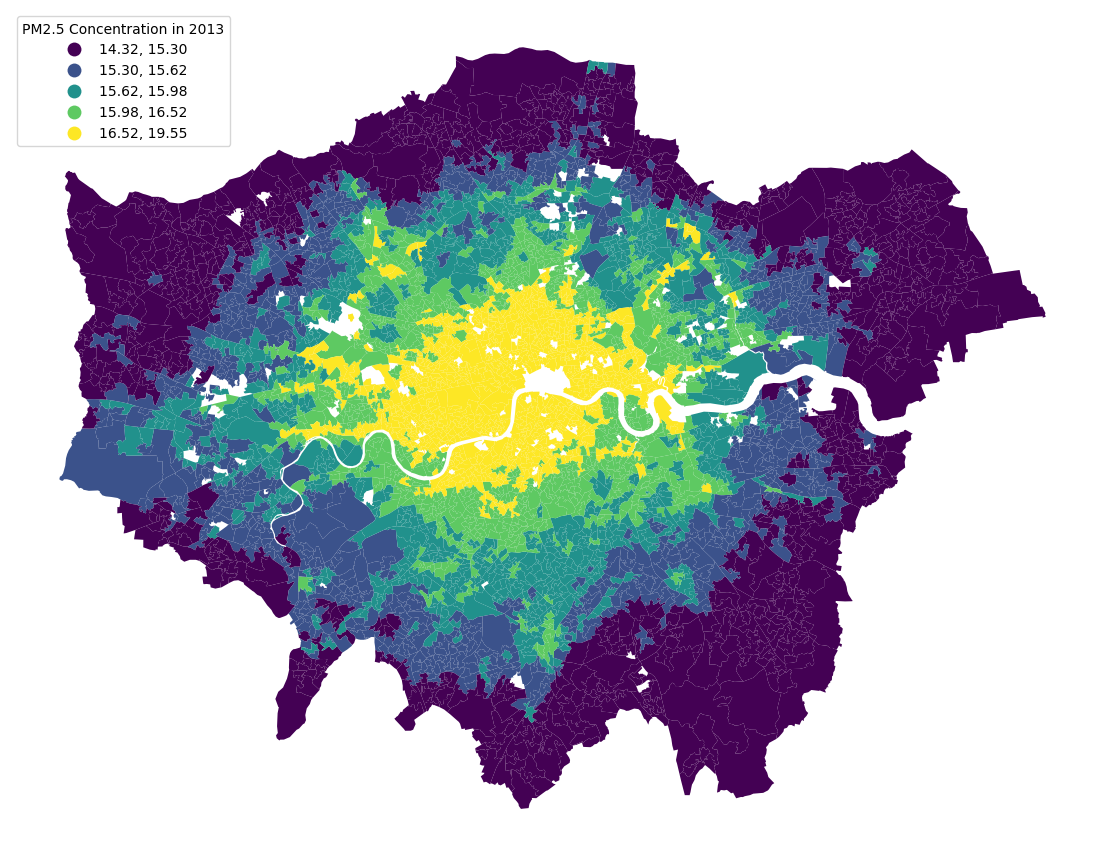

In [96]:
#all crime
fig, ax = plt.subplots(1, figsize=(14, 14))
gdf.plot(column='PM25_13_m', cmap='viridis',
scheme='quantiles', k=5,
linewidth=0.,
legend=True, legend_kwds={"title":"PM2.5 Concentration in 2013","loc": 2},
ax=ax)
ax.set_axis_off()

plt.savefig('PM2.5 Distribution in 2013.png')

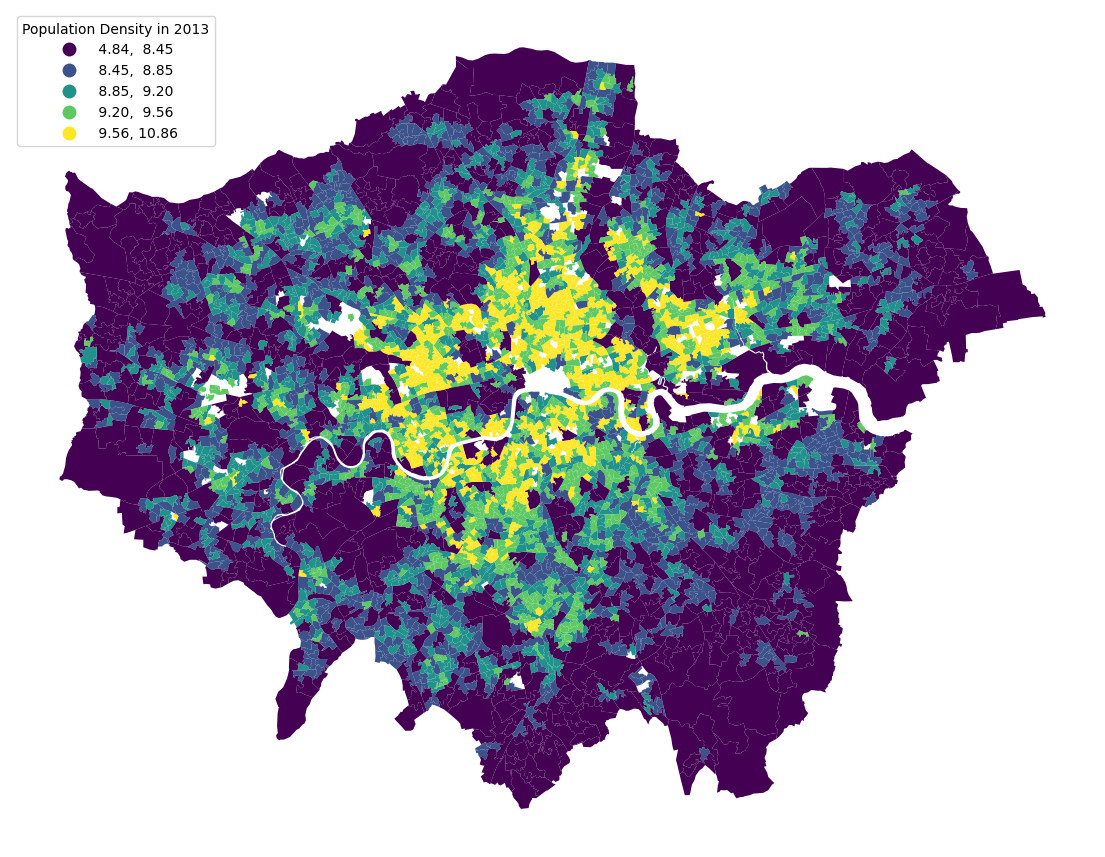

In [97]:
#population density in 2013
fig, ax = plt.subplots(1, figsize=(14, 14))
gdf.plot(column='popden_13', cmap='viridis',
scheme='quantiles', k=5,
linewidth=0.,
legend=True, legend_kwds={"title":"Population Density in 2013","loc": 2},
ax=ax)
ax.set_axis_off()

plt.savefig('Population Density in 2013.png')

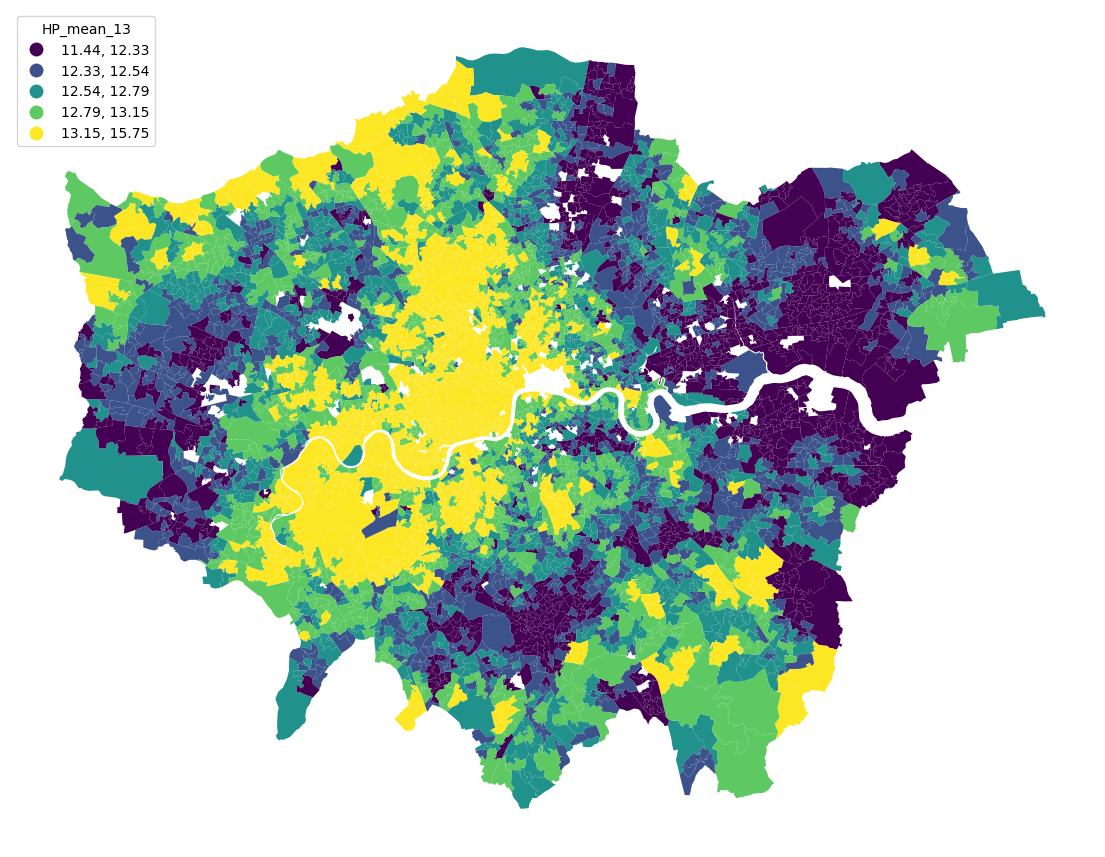

In [98]:
#Average housing price in 2013
fig, ax = plt.subplots(1, figsize=(14, 14))
gdf.plot(column='HP_mean_13', cmap='viridis',
scheme='quantiles', k=5,
linewidth=0.,
legend=True, legend_kwds={"title":"HP_mean_13","loc": 2},
ax=ax)
ax.set_axis_off()